In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("dataframe.csv", low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806428 entries, 0 to 4806427
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_Well                object 
 1   Failure1_CulpritCause  object 
 2   Failure2_CulpritCause  object 
 3   Failure3_CulpritCause  object 
 4   Failure4_CulpritCause  object 
 5   Failure5_CulpritCause  object 
 6   Failure6_CulpritCause  object 
 7   Failure7_CulpritCause  object 
 8   MeasureMRM12           float64
 9   MeasureMRM204          float64
 10  MeasureMRM142          float64
 11  MeasureMRM143          float64
 12  MeasureMRM187          float64
 13  MeasureMRM188          float64
 14  MeasureMRM219          float64
 15  daysToFailure          int64  
dtypes: float64(7), int64(1), object(8)
memory usage: 586.7+ MB


In [4]:
# data['Failure'] = data['daysToFailure'].apply(lambda x: 1 if x <= 15 else 0)
# data.update(data['Failure'])
# data = data.astype({'Failure': 'Int64'})

In [5]:
# data.to_csv('answers.csv', index=False)

In [6]:
sns.set(style='dark')

In [7]:
data.head()

SK_Well Failure1_CulpritCause Failure2_CulpritCause Failure3_CulpritCause  \
0  0001d449            Неизвестно            Неизвестно            Неизвестно   
1  0001d449            Неизвестно            Неизвестно            Неизвестно   
2  0001d449            Неизвестно            Неизвестно            Неизвестно   
3  0001d449            Неизвестно            Неизвестно            Неизвестно   
4  0001d449            Неизвестно            Неизвестно            Неизвестно   

  Failure4_CulpritCause Failure5_CulpritCause Failure6_CulpritCause  \
0            Неизвестно            Неизвестно            Неизвестно   
1            Неизвестно            Неизвестно            Неизвестно   
2            Неизвестно            Неизвестно            Неизвестно   
3            Неизвестно            Неизвестно            Неизвестно   
4            Неизвестно            Неизвестно            Неизвестно   

  Failure7_CulpritCause  MeasureMRM12  MeasureMRM204  MeasureMRM142  \
0            Неизвестно           NaN            NaN            NaN   
1            Неизвестно           NaN            NaN            NaN   
2            Неизвестно           NaN            NaN            NaN   
3            Неизвестно           NaN            NaN            NaN   
4            Неизвестно           NaN            NaN            NaN   

   MeasureMRM143  MeasureMRM187  MeasureMRM188  MeasureMRM219  daysToFailure  
0            NaN            NaN            NaN            NaN            773  
1            NaN            NaN            NaN            NaN            772  
2            NaN            NaN            NaN            NaN            771  
3            NaN            NaN            NaN            NaN            770  
4            NaN            NaN            NaN            NaN            769

In [8]:
data.shape

(4806428, 16)

In [9]:
missing_values_count = data.isnull().sum()

print("Количество нулей в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество нулей в каждой колонке:
SK_Well: 0
Failure1_CulpritCause: 0
Failure2_CulpritCause: 0
Failure3_CulpritCause: 0
Failure4_CulpritCause: 0
Failure5_CulpritCause: 0
Failure6_CulpritCause: 0
Failure7_CulpritCause: 0
MeasureMRM12: 754063
MeasureMRM204: 636824
MeasureMRM142: 135630
MeasureMRM143: 650670
MeasureMRM187: 649556
MeasureMRM188: 649556
MeasureMRM219: 838587
daysToFailure: 0


In [10]:
data=data.dropna(thresh=data.shape[0] //2, axis=1)
data.shape

(4806428, 16)

In [11]:
missing_values_count = data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
SK_Well: 0
Failure1_CulpritCause: 0
Failure2_CulpritCause: 0
Failure3_CulpritCause: 0
Failure4_CulpritCause: 0
Failure5_CulpritCause: 0
Failure6_CulpritCause: 0
Failure7_CulpritCause: 0
MeasureMRM12: 754063
MeasureMRM204: 636824
MeasureMRM142: 135630
MeasureMRM143: 650670
MeasureMRM187: 649556
MeasureMRM188: 649556
MeasureMRM219: 838587
daysToFailure: 0


In [12]:
def many_plot(series):
    layout = (2, 3)
    fig, axs = plt.subplots(layout[0], layout[1], figsize=(14, 10))

    for i, (key, value) in enumerate(series.items()):
        row = i // layout[1]
        col = i % layout[1]
        ax = axs[row, col]
        ax.set_title(key)
        sns.lineplot(data=value, ax=ax, color='blue')
        
        ax.set(xlabel='t')
        ax.grid(True)
    
    plt.tight_layout()
    # plt.savefig('TS features.png', dpi=300)
    plt.show()
    

In [13]:
# anomal = data[data['daysToFailure'] <= 15].copy()
# clean_data = data[data['daysToFailure'] > 15].copy()

In [14]:
# anomalies=anomal[['ReservoirTemperature_c', 'MeasureMRM204',
#        'MeasureMRM205', 'ProducingGOR_m3_t', 'LiquidViscosity',
#        'MeasureMRM219', 'WeightedParticlesFactor_mg_l', 'MeasureMRM187',
#        'MeasureMRM188', 'MeasureMRM12', 'MeasureMRM30', 'MeasureMRM143',
#        'MeasureMRM144']]

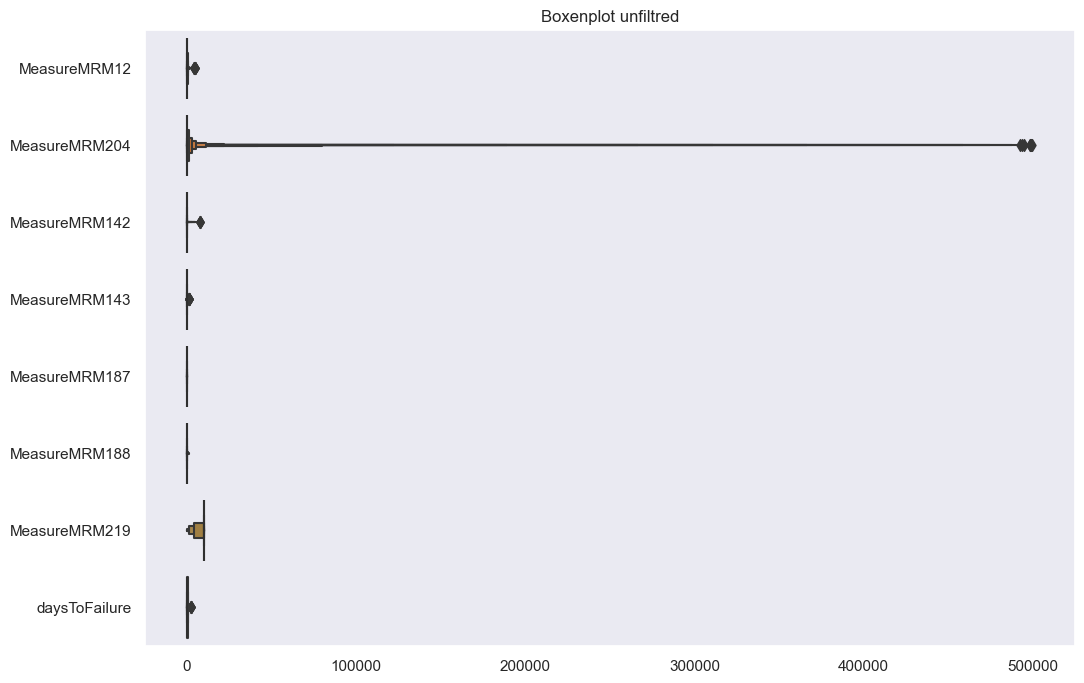

In [15]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=data,palette='Dark2', orient='h')
plt.title('Boxenplot unfiltred')
# plt.savefig('boxenplot_unfiltred.png', dpi=500)
plt.show()

Подгоняем Min и Max по эксельке

In [16]:
data.describe()

MeasureMRM12  MeasureMRM204  MeasureMRM142  MeasureMRM143  \
count  4.052365e+06   4.169604e+06   4.670798e+06   4.155758e+06   
mean   1.383620e+02   1.103570e+03   1.426102e+01   2.303716e+01   
std    2.007676e+02   8.622340e+03   1.846396e+01   1.811925e+01   
min    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
25%    2.900000e+01   0.000000e+00   1.060000e+01   1.100000e+01   
50%    5.700000e+01   5.000000e-01   1.310000e+01   1.920000e+01   
75%    1.480000e+02   2.916000e+02   1.620000e+01   2.820000e+01   
max    4.880000e+03   4.997184e+05   7.901800e+03   9.581000e+02   

       MeasureMRM187  MeasureMRM188  MeasureMRM219  daysToFailure  
count   4.156872e+06   4.156872e+06   3.967841e+06   4.806428e+06  
mean    4.268666e+01   3.237557e+01   9.382271e+03   3.152309e+02  
std     3.559566e+01   7.099768e+01   2.126649e+03   2.512979e+02  
min     0.000000e+00   0.000000e+00   1.000000e+00   1.000000e+00  
25%     0.000000e+00   1.300000e+01   9.999000e+03   1.140000e+02  
50%     5.600000e+01   2.400000e+01   9.999000e+03   2.570000e+02  
75%     6.600000e+01   3.620000e+01   9.999000e+03   4.600000e+02  
max     6.554000e+02   1.000000e+03   1.000000e+04   2.583000e+03

In [17]:
data.shape

(4806428, 16)

In [18]:
data = data[
    (data['MeasureMRM12'] <= 2000) &
    (data['MeasureMRM143'] <= 150) &
    (data['MeasureMRM187'] >= 50) & (data['MeasureMRM187'] <= 300) &
    (data['MeasureMRM188'] <= 400)
]
data.describe()

MeasureMRM12  MeasureMRM204  MeasureMRM142  MeasureMRM143  \
count  2.357999e+06   2.357201e+06   2.355366e+06   2.357999e+06   
mean   1.134170e+02   1.083935e+03   1.422008e+01   2.040204e+01   
std    1.486966e+02   9.002668e+03   1.458994e+01   1.298531e+01   
min    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
25%    2.800000e+01   0.000000e+00   1.060000e+01   1.110000e+01   
50%    5.500000e+01   2.100000e+00   1.310000e+01   1.850000e+01   
75%    1.300000e+02   2.989000e+02   1.610000e+01   2.500000e+01   
max    1.997000e+03   4.997184e+05   6.917300e+03   1.494000e+02   

       MeasureMRM187  MeasureMRM188  MeasureMRM219  daysToFailure  
count   2.357999e+06   2.357999e+06   2.354705e+06   2.357999e+06  
mean    6.549780e+01   3.268385e+01   9.625878e+03   3.092525e+02  
std     1.123811e+01   1.957294e+01   1.638430e+03   2.430437e+02  
min     5.000000e+01   0.000000e+00   1.000000e+00   1.000000e+00  
25%     5.700000e+01   2.060000e+01   9.999000e+03   1.160000e+02  
50%     6.300000e+01   2.800000e+01   9.999000e+03   2.520000e+02  
75%     7.100000e+01   3.900000e+01   9.999000e+03   4.480000e+02  
max     3.000000e+02   4.000000e+02   1.000000e+04   1.223000e+03

In [19]:
missing_values_count = data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
SK_Well: 0
Failure1_CulpritCause: 0
Failure2_CulpritCause: 0
Failure3_CulpritCause: 0
Failure4_CulpritCause: 0
Failure5_CulpritCause: 0
Failure6_CulpritCause: 0
Failure7_CulpritCause: 0
MeasureMRM12: 0
MeasureMRM204: 798
MeasureMRM142: 2633
MeasureMRM143: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM219: 3294
daysToFailure: 0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2357999 entries, 15 to 4806381
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_Well                object 
 1   Failure1_CulpritCause  object 
 2   Failure2_CulpritCause  object 
 3   Failure3_CulpritCause  object 
 4   Failure4_CulpritCause  object 
 5   Failure5_CulpritCause  object 
 6   Failure6_CulpritCause  object 
 7   Failure7_CulpritCause  object 
 8   MeasureMRM12           float64
 9   MeasureMRM204          float64
 10  MeasureMRM142          float64
 11  MeasureMRM143          float64
 12  MeasureMRM187          float64
 13  MeasureMRM188          float64
 14  MeasureMRM219          float64
 15  daysToFailure          int64  
dtypes: float64(7), int64(1), object(8)
memory usage: 305.8+ MB


In [21]:
data.shape

(2357999, 16)

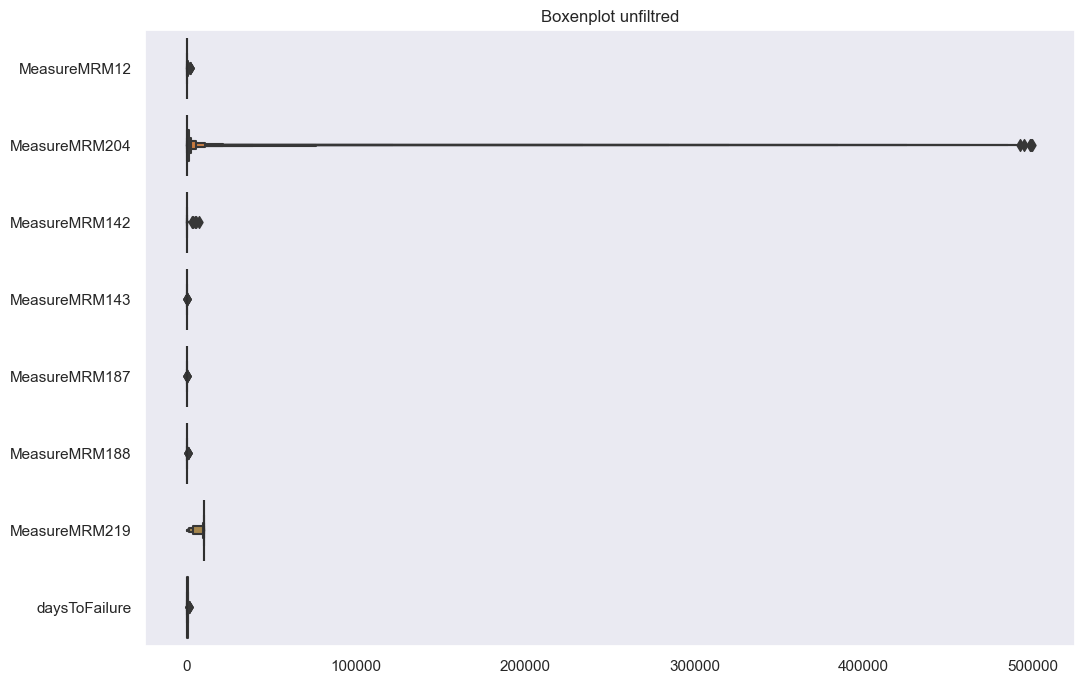

In [22]:
plt.figure(figsize=(12, 8))
sns.boxenplot(data=data,palette='Dark2', orient='h')
plt.title('Boxenplot unfiltred')
# plt.savefig('boxenplot_unfiltred.png', dpi=500)
plt.show()

In [23]:
def remove_outliers_and_interpolate(column, threshold):
    Q1 = np.percentile(column.dropna(), 25)
    Q3 = np.percentile(column.dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    filtered_column = column[(column >= lower_bound) & (column <= upper_bound)]
    interpolated_column = filtered_column.interpolate(method='nearest')
    return interpolated_column

threshold = 3.5  # Новое пороговое значение
columns_names = ['MeasureMRM204']

# Применение функции к указанным колонкам
for column_name in columns_names:
    if column_name in data.columns:
        data[column_name] = remove_outliers_and_interpolate(data[column_name], threshold)

# Обновление датасета X
# Предполагается, что series - это DataFrame, который нужно обновить
data = pd.concat([data.loc[:, ~data.columns.isin(columns_names)], data[columns_names]], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2357999 entries, 15 to 4806381
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_Well                object 
 1   Failure1_CulpritCause  object 
 2   Failure2_CulpritCause  object 
 3   Failure3_CulpritCause  object 
 4   Failure4_CulpritCause  object 
 5   Failure5_CulpritCause  object 
 6   Failure6_CulpritCause  object 
 7   Failure7_CulpritCause  object 
 8   MeasureMRM12           float64
 9   MeasureMRM142          float64
 10  MeasureMRM143          float64
 11  MeasureMRM187          float64
 12  MeasureMRM188          float64
 13  MeasureMRM219          float64
 14  daysToFailure          int64  
 15  MeasureMRM204          float64
dtypes: float64(7), int64(1), object(8)
memory usage: 305.8+ MB


In [24]:
data.describe()

MeasureMRM12  MeasureMRM142  MeasureMRM143  MeasureMRM187  \
count  2.357999e+06   2.355366e+06   2.357999e+06   2.357999e+06   
mean   1.134170e+02   1.422008e+01   2.040204e+01   6.549780e+01   
std    1.486966e+02   1.458994e+01   1.298531e+01   1.123811e+01   
min    0.000000e+00   0.000000e+00   0.000000e+00   5.000000e+01   
25%    2.800000e+01   1.060000e+01   1.110000e+01   5.700000e+01   
50%    5.500000e+01   1.310000e+01   1.850000e+01   6.300000e+01   
75%    1.300000e+02   1.610000e+01   2.500000e+01   7.100000e+01   
max    1.997000e+03   6.917300e+03   1.494000e+02   3.000000e+02   

       MeasureMRM188  MeasureMRM219  daysToFailure  MeasureMRM204  
count   2.357999e+06   2.354705e+06   2.357999e+06   2.115157e+06  
mean    3.268385e+01   9.625878e+03   3.092525e+02   1.401570e+02  
std     1.957294e+01   1.638430e+03   2.430437e+02   2.784435e+02  
min     0.000000e+00   1.000000e+00   1.000000e+00   0.000000e+00  
25%     2.060000e+01   9.999000e+03   1.160000e+02   0.000000e+00  
50%     2.800000e+01   9.999000e+03   2.520000e+02   0.000000e+00  
75%     3.900000e+01   9.999000e+03   4.480000e+02   1.300000e+02  
max     4.000000e+02   1.000000e+04   1.223000e+03   1.345000e+03

In [25]:
data.nunique()

SK_Well                   5800
Failure1_CulpritCause       42
Failure2_CulpritCause       45
Failure3_CulpritCause       48
Failure4_CulpritCause       39
Failure5_CulpritCause       32
Failure6_CulpritCause       26
Failure7_CulpritCause       17
MeasureMRM12              1300
MeasureMRM142             1621
MeasureMRM143             1199
MeasureMRM187             1174
MeasureMRM188             2066
MeasureMRM219             9551
daysToFailure             1223
MeasureMRM204            13451
dtype: int64

In [26]:
missing_values_count = data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
SK_Well: 0
Failure1_CulpritCause: 0
Failure2_CulpritCause: 0
Failure3_CulpritCause: 0
Failure4_CulpritCause: 0
Failure5_CulpritCause: 0
Failure6_CulpritCause: 0
Failure7_CulpritCause: 0
MeasureMRM12: 0
MeasureMRM142: 2633
MeasureMRM143: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM219: 3294
daysToFailure: 0
MeasureMRM204: 242842


In [27]:
data=data.interpolate(method='pad')

In [32]:
missing_values_count = data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
SK_Well: 0
Failure1_CulpritCause: 0
Failure2_CulpritCause: 0
Failure3_CulpritCause: 0
Failure4_CulpritCause: 0
Failure5_CulpritCause: 0
Failure6_CulpritCause: 0
Failure7_CulpritCause: 0
MeasureMRM12: 0
MeasureMRM142: 0
MeasureMRM143: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM219: 0
daysToFailure: 0
MeasureMRM204: 0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SK_Well                747 non-null    object 
 1   Failure1_CulpritCause  747 non-null    object 
 2   Failure2_CulpritCause  747 non-null    object 
 3   Failure3_CulpritCause  747 non-null    object 
 4   Failure4_CulpritCause  747 non-null    object 
 5   Failure5_CulpritCause  747 non-null    object 
 6   Failure6_CulpritCause  747 non-null    object 
 7   Failure7_CulpritCause  747 non-null    object 
 8   MeasureMRM12           747 non-null    float64
 9   MeasureMRM142          747 non-null    float64
 10  MeasureMRM143          747 non-null    float64
 11  MeasureMRM187          747 non-null    float64
 12  MeasureMRM188          747 non-null    float64
 13  MeasureMRM219          747 non-null    float64
 14  daysToFailure          747 non-null    int64  
 15  Measur

In [28]:
# import os

# # Предполагаем, что ваш DataFrame называется 'data'
# # Убедитесь, что папка 'prepared_data' существует или создайте её
# output_dir = 'prepared_data'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Проходим по уникальным значениям в столбце 'SK_Well'
# for sk_well in data['SK_Well'].unique():
#     # Фильтруем строки по текущему значению 'SK_Well'
#     filtered_df = data[data['SK_Well'] == sk_well]
    
#     # Сохраняем отфильтрованный DataFrame в CSV файл
#     output_file = os.path.join(output_dir, f'{sk_well}.csv')
#     filtered_df.to_csv(output_file, index=False)

# print("Файлы успешно сохранены!")

In [29]:
data.columns

Index(['SK_Well', 'Failure1_CulpritCause', 'Failure2_CulpritCause',
       'Failure3_CulpritCause', 'Failure4_CulpritCause',
       'Failure5_CulpritCause', 'Failure6_CulpritCause',
       'Failure7_CulpritCause', 'MeasureMRM12', 'MeasureMRM142',
       'MeasureMRM143', 'MeasureMRM187', 'MeasureMRM188', 'MeasureMRM219',
       'daysToFailure', 'MeasureMRM204'],
      dtype='object')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2357999 entries, 15 to 4806381
Data columns (total 16 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_Well                object 
 1   Failure1_CulpritCause  object 
 2   Failure2_CulpritCause  object 
 3   Failure3_CulpritCause  object 
 4   Failure4_CulpritCause  object 
 5   Failure5_CulpritCause  object 
 6   Failure6_CulpritCause  object 
 7   Failure7_CulpritCause  object 
 8   MeasureMRM12           float64
 9   MeasureMRM142          float64
 10  MeasureMRM143          float64
 11  MeasureMRM187          float64
 12  MeasureMRM188          float64
 13  MeasureMRM219          float64
 14  daysToFailure          int64  
 15  MeasureMRM204          float64
dtypes: float64(7), int64(1), object(8)
memory usage: 305.8+ MB


In [6]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft

# Функция для применения FFT к выбранным колонкам данных
def apply_fft(data, columns):
    # Применяем FFT только к указанным столбцам
    fft_features = {}
    for column in columns:
        if column in data.columns:
            # Преобразуем данные в числовой тип, игнорируя ошибки
            numeric_data = pd.to_numeric(data[column], errors='coerce').fillna(0).to_numpy()
            if numeric_data.ndim == 1:  # Проверяем, что это одномерный массив
                fft_result = fft(numeric_data)
                # Извлекаем реальные и мнимые части
                fft_real = np.real(fft_result)
                fft_imag = np.imag(fft_result)
                # Добавляем результаты FFT в словарь
                fft_features[f'{column}_fft_real'] = fft_real
                fft_features[f'{column}_fft_imag'] = fft_imag
    return pd.DataFrame(fft_features)

# Директория с разделенными CSV файлами
input_dir = 'prepared_data'

# Убедитесь, что папка 'fft_wells' существует или создайте её
output_dir = 'fft_wells'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Колонки, к которым нужно применить FFT
fft_columns = ['MeasureMRM12', 'MeasureMRM142', 'MeasureMRM143', 'MeasureMRM187', 
               'MeasureMRM188', 'MeasureMRM219', 'MeasureMRM204']

# Проходим по всем CSV файлам в директории 'prepared_data'
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        data = pd.read_csv(file_path)
        
        # Применение FFT к данным
        fft_data = apply_fft(data, fft_columns)
        
        # Объединение исходных данных и данных FFT
        combined_data = pd.concat([data, fft_data], axis=1)
        
        # Сохранение комбинированных данных в новый CSV файл
        output_file = os.path.join(output_dir, filename)
        combined_data.to_csv(output_file, index=False)

print("Файлы успешно обработаны и сохранены!")

Файлы успешно обработаны и сохранены!


In [7]:
import pandas as pd   
from pathlib import Path
import fileinput
import glob

data_dir = Path("fft_wells")

df = pd.concat([pd.read_csv(f) for f in data_dir.glob("*.csv")], ignore_index=True)
df.to_csv("fft_data.csv", index=False)
print('объединение выполненно')

объединение выполненно


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357999 entries, 0 to 2357998
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_Well                 object 
 1   Failure1_CulpritCause   object 
 2   Failure2_CulpritCause   object 
 3   Failure3_CulpritCause   object 
 4   Failure4_CulpritCause   object 
 5   Failure5_CulpritCause   object 
 6   Failure6_CulpritCause   object 
 7   Failure7_CulpritCause   object 
 8   MeasureMRM12            float64
 9   MeasureMRM142           float64
 10  MeasureMRM143           float64
 11  MeasureMRM187           float64
 12  MeasureMRM188           float64
 13  MeasureMRM219           float64
 14  daysToFailure           int64  
 15  MeasureMRM204           float64
 16  MeasureMRM12_fft_real   float64
 17  MeasureMRM12_fft_imag   float64
 18  MeasureMRM142_fft_real  float64
 19  MeasureMRM142_fft_imag  float64
 20  MeasureMRM143_fft_real  float64
 21  MeasureMRM143_fft_imag  float64

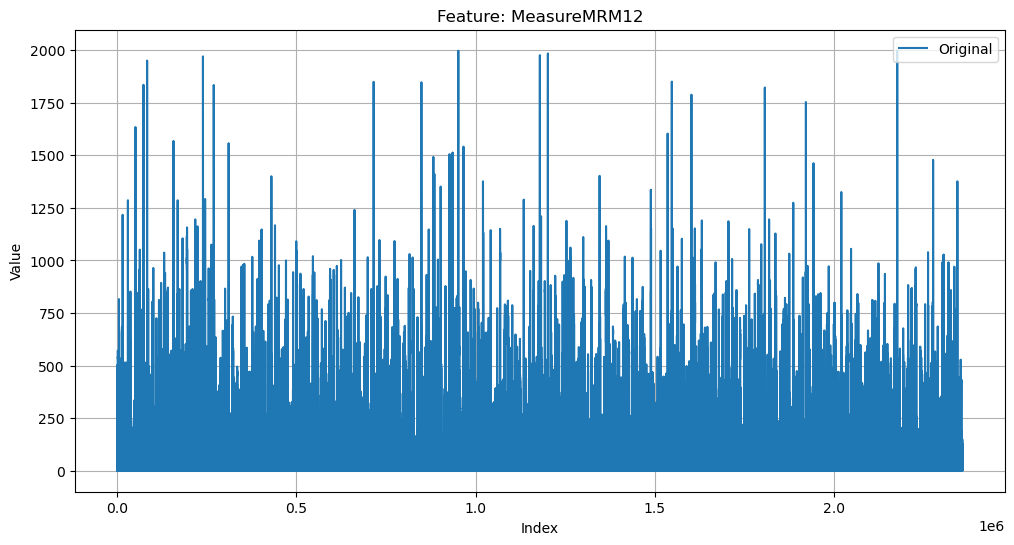

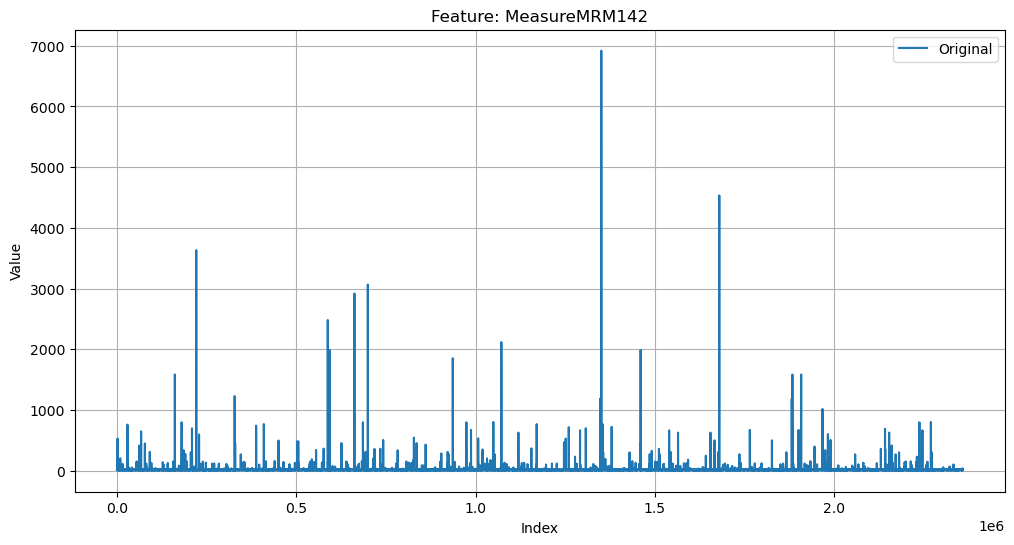

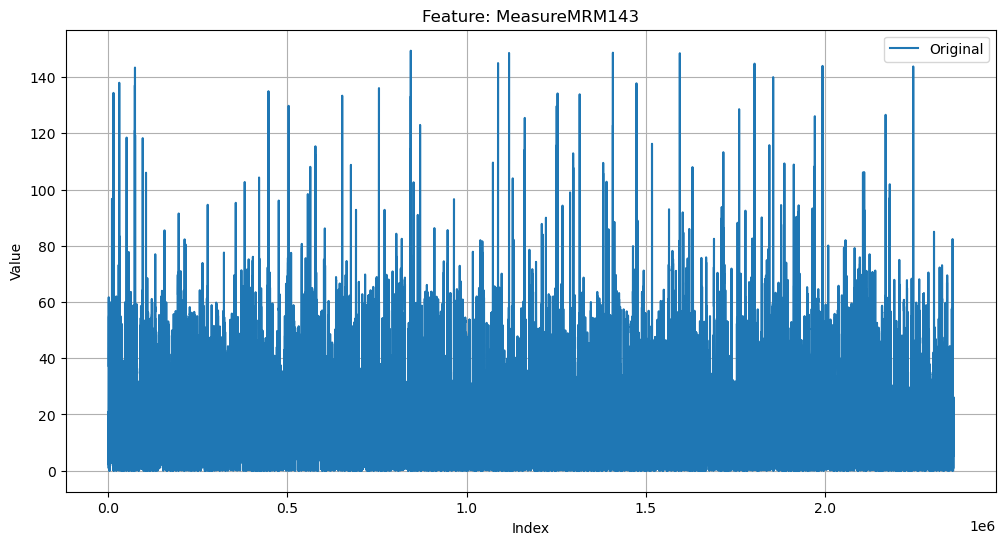

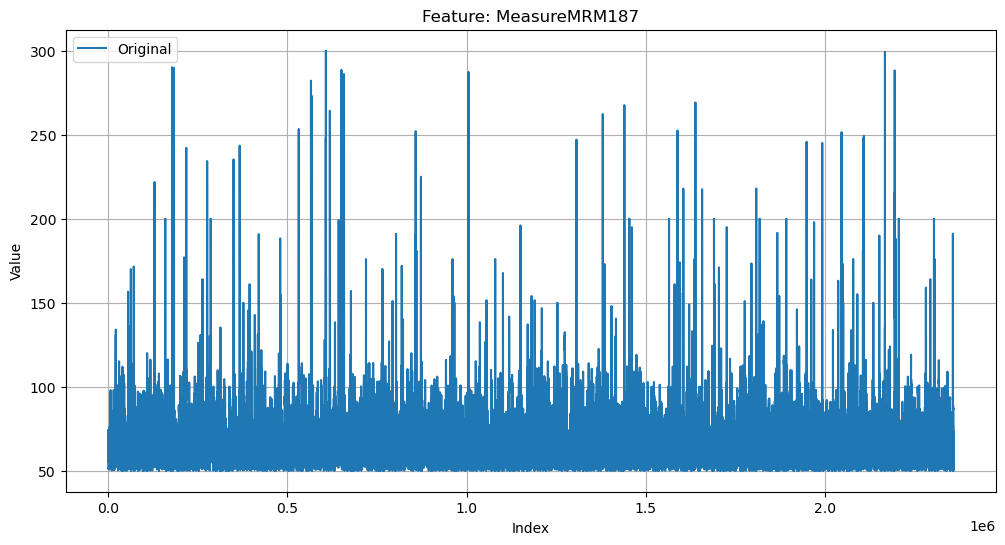

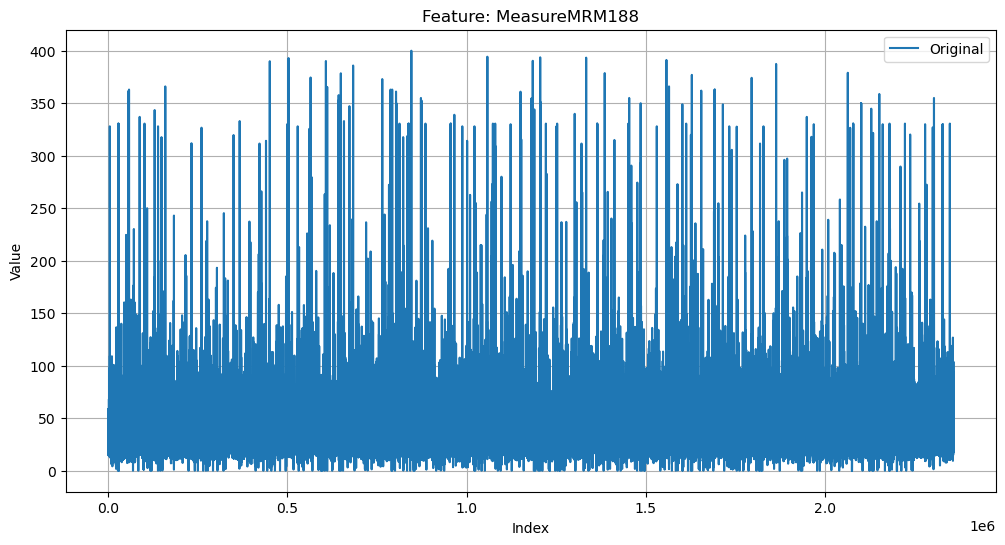

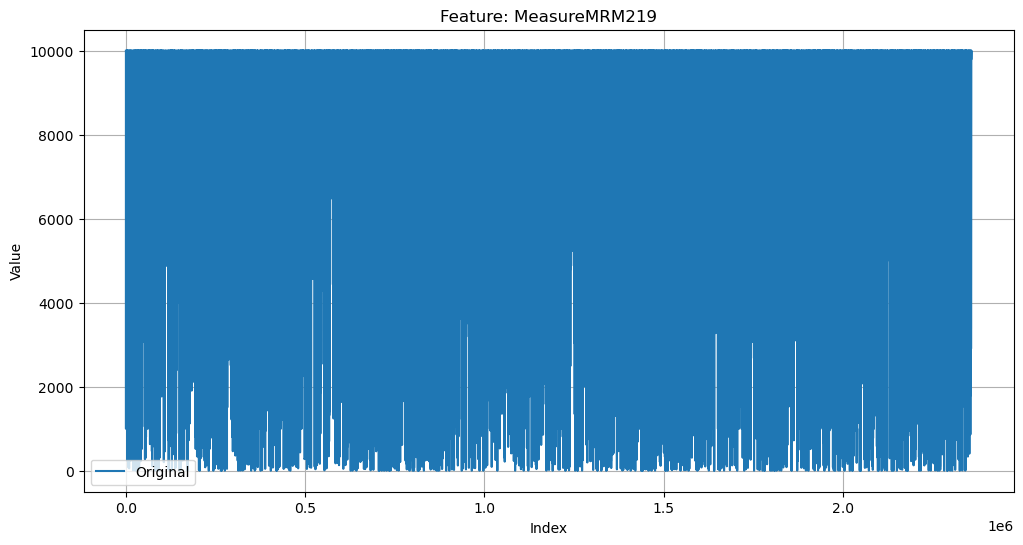

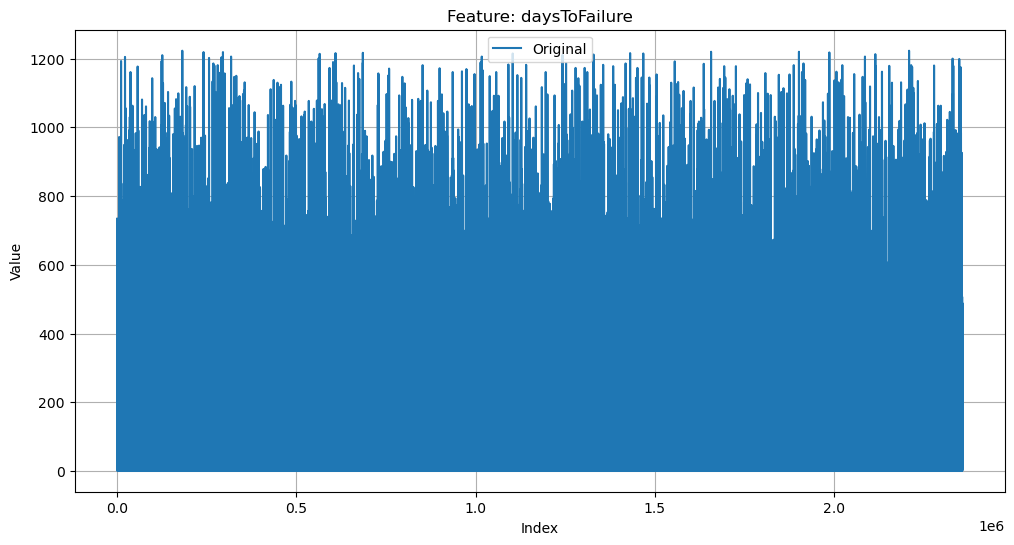

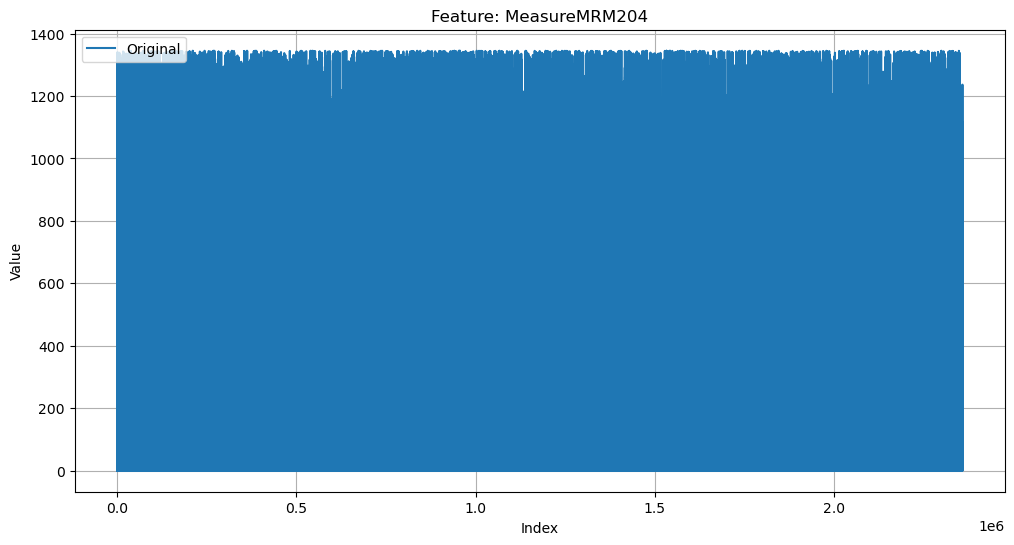

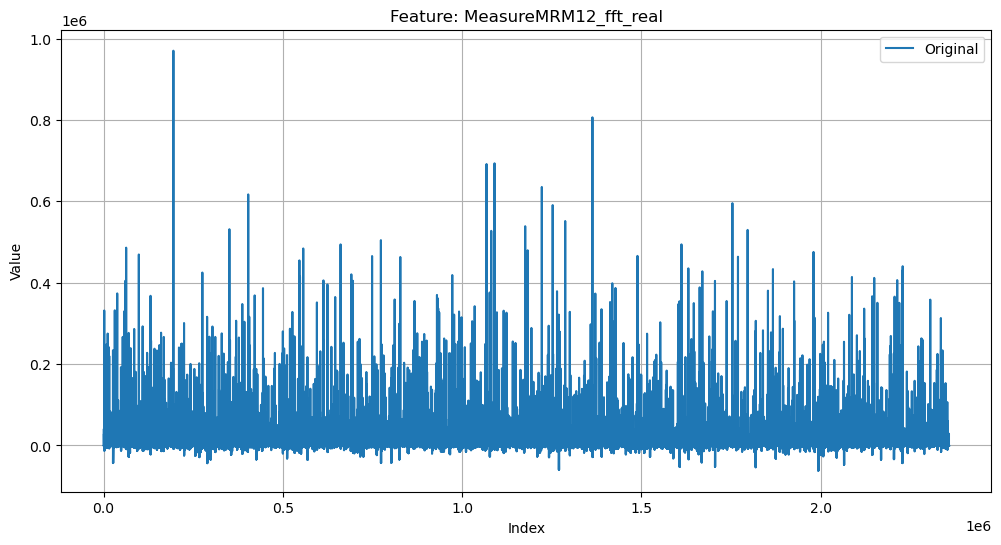

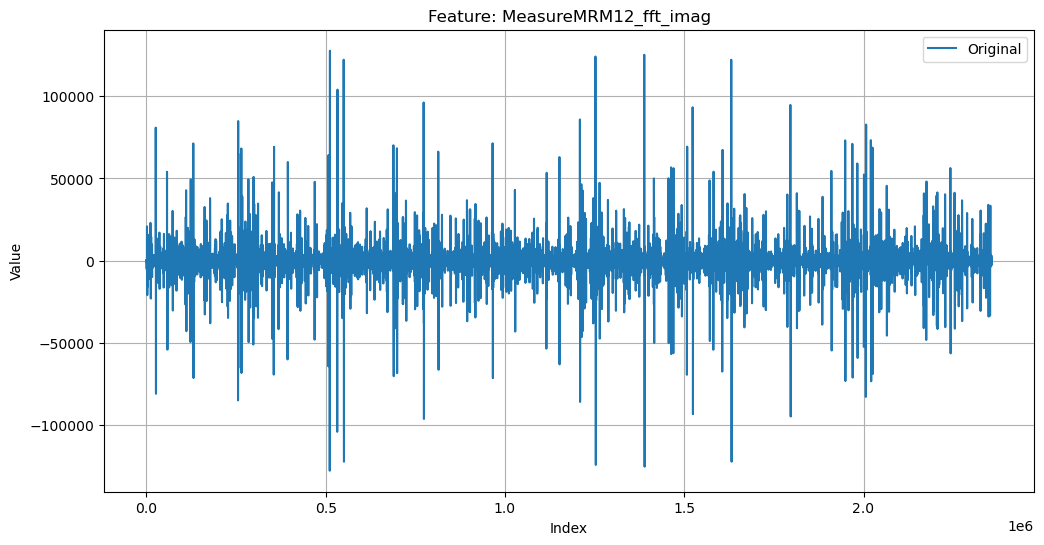

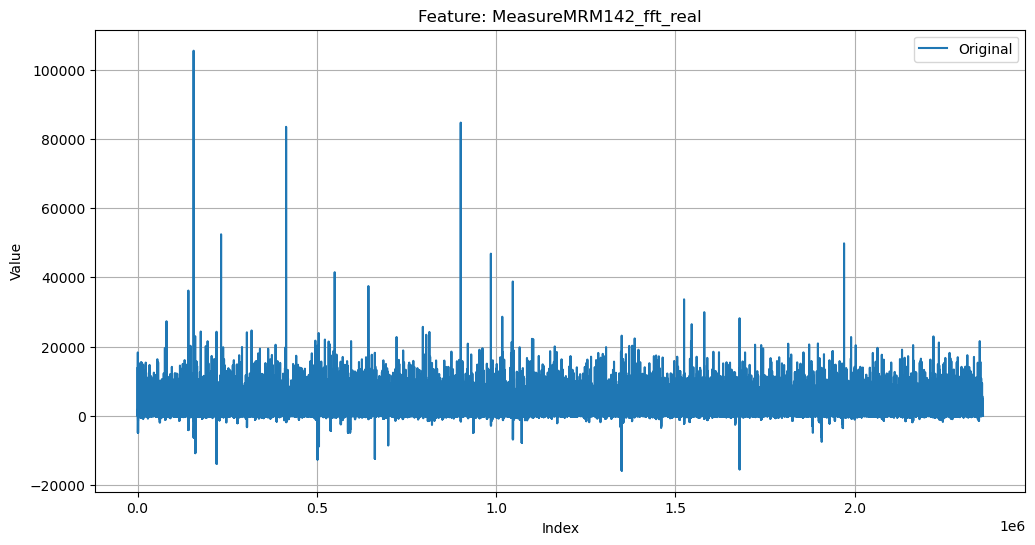

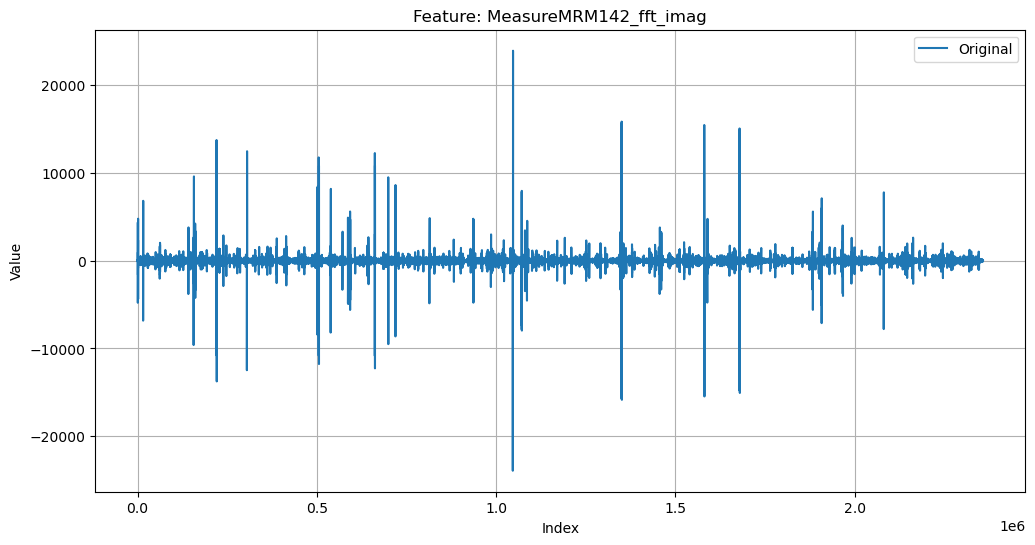

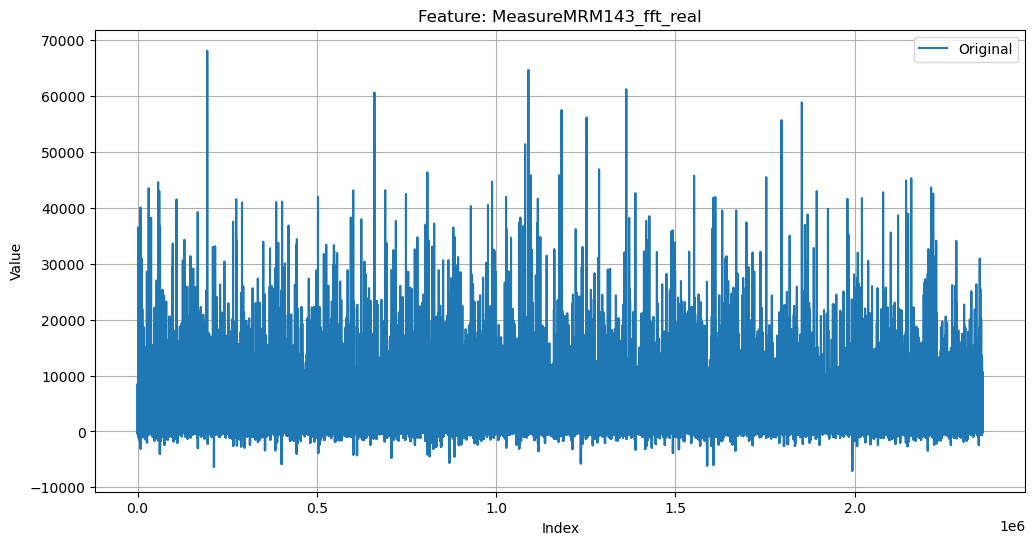

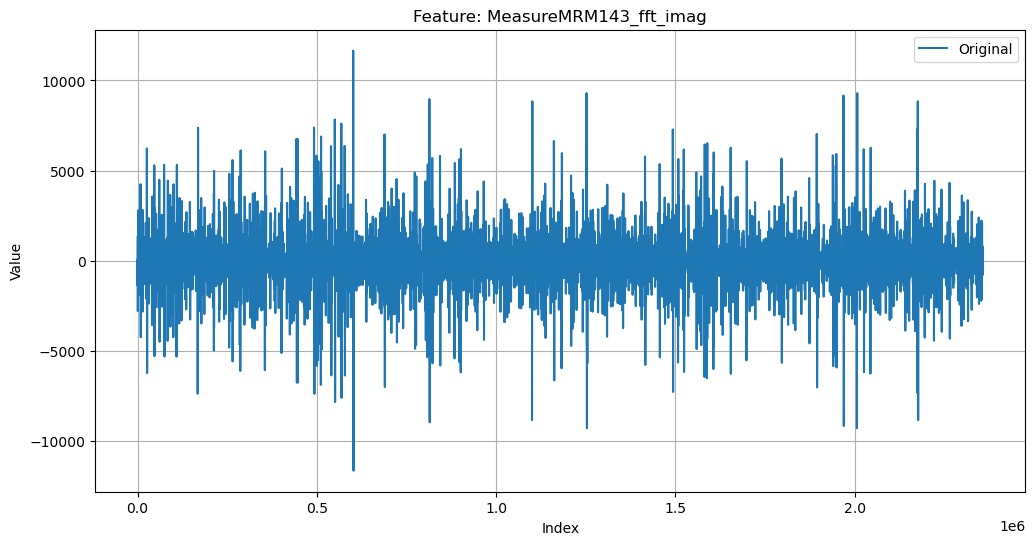

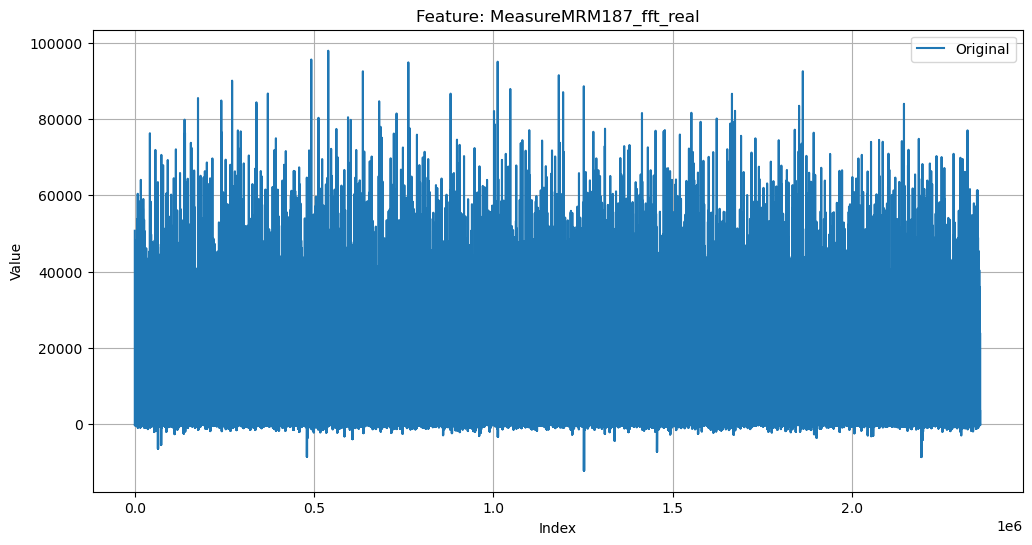

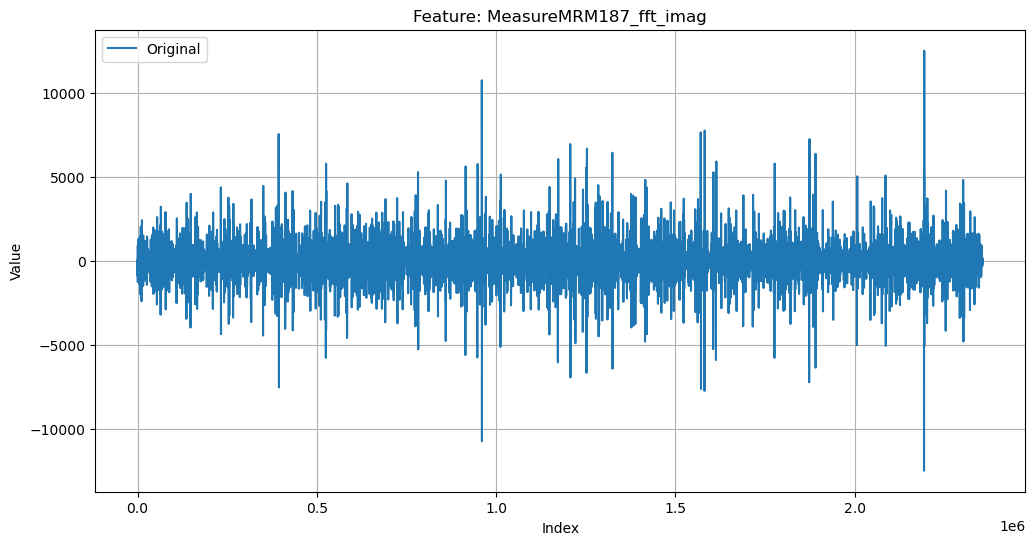

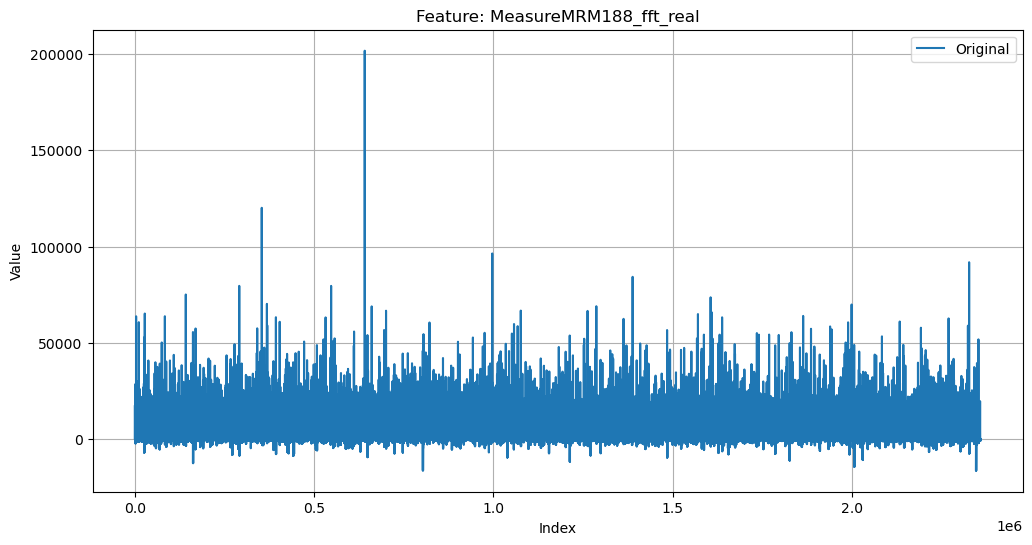

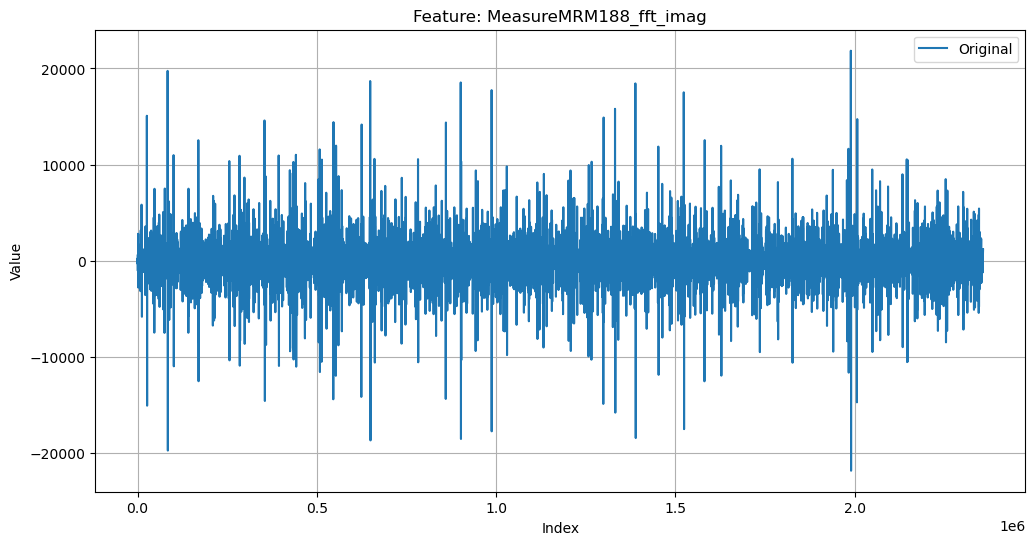

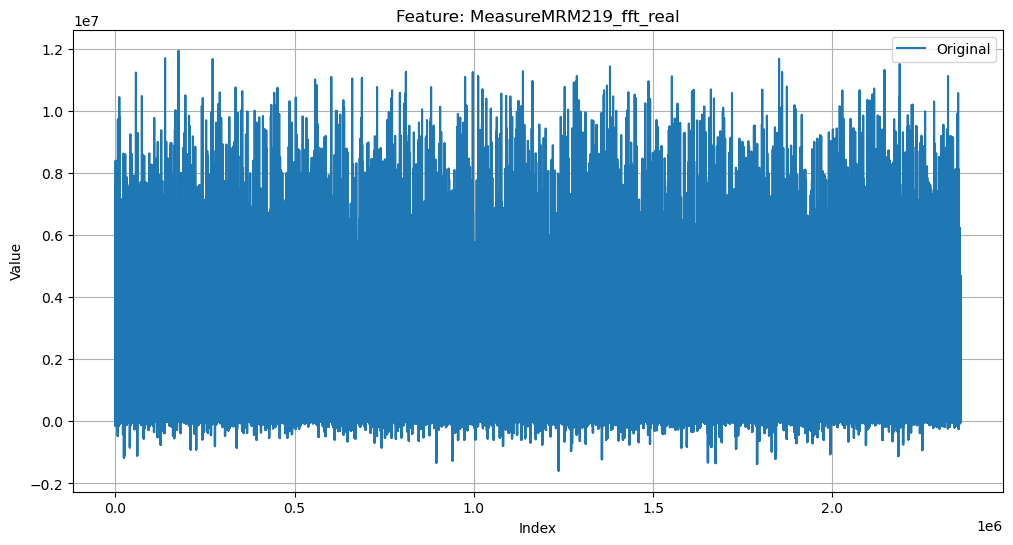

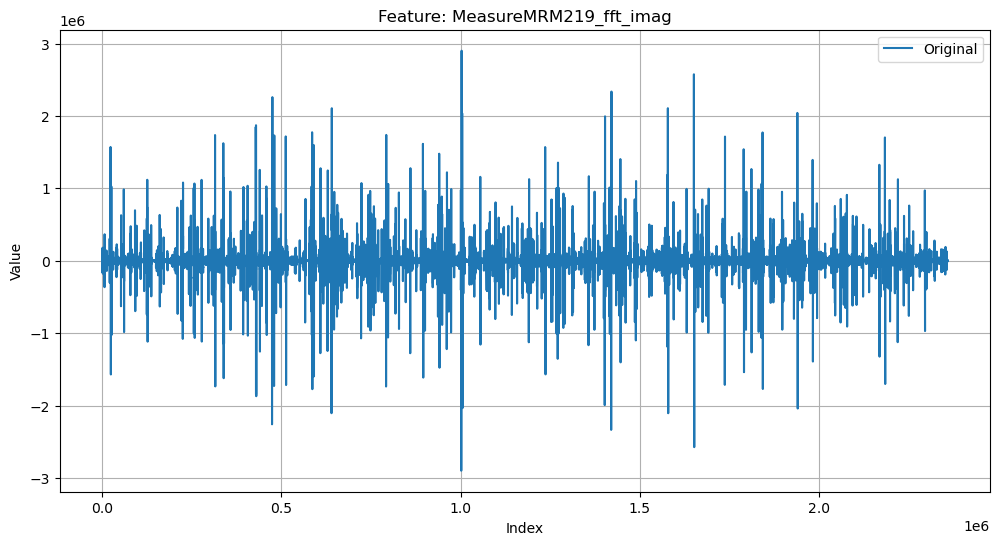

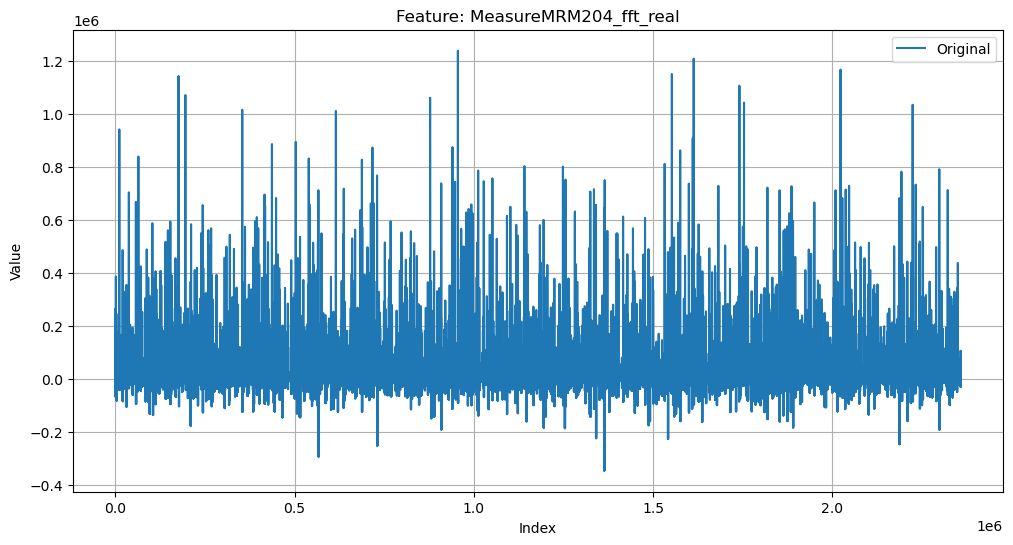

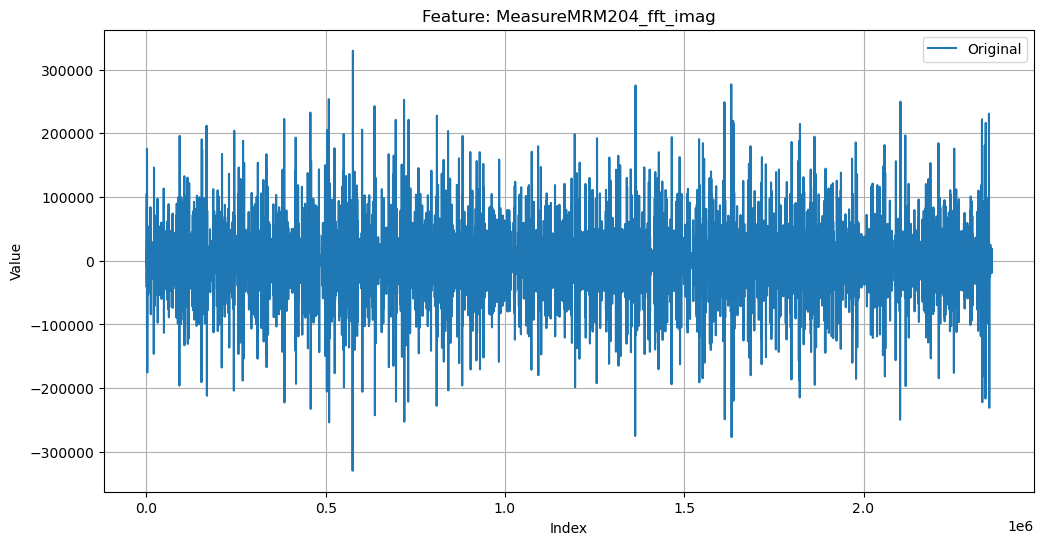

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузим данные из объединенного CSV файла
# df = pd.read_csv("fft_data.csv")

# Получаем список всех числовых колонок, кроме 'fft_real' и 'fft_imag'
features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.startswith('fft_')]

# Создаем графики для каждой фичи
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Оригинальная колонка
    plt.plot(df[feature], label='Original')
    
    # FFT реальная часть
    fft_real_col = f'fft_real_{feature}'
    if fft_real_col in df.columns:
        plt.plot(df[fft_real_col], label='FFT Real')
    
    # FFT мнимая часть
    fft_imag_col = f'fft_imag_{feature}'
    if fft_imag_col in df.columns:
        plt.plot(df[fft_imag_col], label='FFT Imag')
    
    # Настройки графика
    plt.title(f'Feature: {feature}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    
    # Сохранение графика
    plt.savefig(f'{feature}_fft_plot.png')
    plt.show()

In [11]:
dataframe_anomaly = df[(df['daysToFailure'] <= 30)]
normal_data=df[(df['daysToFailure'] > 30)]
dataframe_anomaly.shape, normal_data.shape

((156631, 30), (2201368, 30))

In [12]:
normal_data.to_csv('normal_fft.csv', index=False)
dataframe_anomaly.to_csv('anomaly_fft.csv', index=False)

In [ ]:
dataframe_anomaly = data[(data['daysToFailure'] <= 30)]
normal_data=data[(data['daysToFailure'] > 30)]
dataframe_anomaly.shape, normal_data.shape

((156631, 16), (2201368, 16))

In [ ]:
normal_data.head()

SK_Well Failure1_CulpritCause Failure2_CulpritCause  \
15  0001d449  Механические примеси            Неизвестно   
16  0001d449  Механические примеси            Неизвестно   
17  0001d449  Механические примеси            Неизвестно   
18  0001d449  Механические примеси            Неизвестно   
19  0001d449  Механические примеси            Неизвестно   

   Failure3_CulpritCause Failure4_CulpritCause Failure5_CulpritCause  \
15            Неизвестно            Неизвестно            Неизвестно   
16            Неизвестно            Неизвестно            Неизвестно   
17            Неизвестно            Неизвестно            Неизвестно   
18            Неизвестно            Неизвестно            Неизвестно   
19            Неизвестно            Неизвестно            Неизвестно   

   Failure6_CulpritCause Failure7_CulpritCause  MeasureMRM12  MeasureMRM142  \
15            Неизвестно            Неизвестно          52.0           18.9   
16            Неизвестно            Неизвестно          52.0           19.0   
17            Неизвестно            Неизвестно          51.0           19.2   
18            Неизвестно            Неизвестно          51.0           19.4   
19            Неизвестно            Неизвестно          50.0           18.9   

    MeasureMRM143  MeasureMRM187  MeasureMRM188  MeasureMRM219  daysToFailure  \
15           19.7           73.9           23.4         9999.0            234   
16           19.7           73.8           23.5         9999.0            233   
17           19.7           73.9           23.6         9999.0            232   
18           19.7           73.7           23.6         8441.0            231   
19           19.7           73.7           23.1         9999.0            230   

    MeasureMRM204  
15            0.0  
16            0.0  
17            0.0  
18            0.0  
19            0.0

In [ ]:
missing_values_count = normal_data.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
SK_Well: 0
Failure1_CulpritCause: 0
Failure2_CulpritCause: 0
Failure3_CulpritCause: 0
Failure4_CulpritCause: 0
Failure5_CulpritCause: 0
Failure6_CulpritCause: 0
Failure7_CulpritCause: 0
MeasureMRM12: 0
MeasureMRM142: 0
MeasureMRM143: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM219: 0
daysToFailure: 0
MeasureMRM204: 0


In [ ]:
missing_values_count = dataframe_anomaly.isna().sum()

print("Количество пропущенных значений в каждой колонке:")
for column, count in missing_values_count.items():
    print(f"{column}: {count}")

Количество пропущенных значений в каждой колонке:
SK_Well: 0
Failure1_CulpritCause: 0
Failure2_CulpritCause: 0
Failure3_CulpritCause: 0
Failure4_CulpritCause: 0
Failure5_CulpritCause: 0
Failure6_CulpritCause: 0
Failure7_CulpritCause: 0
MeasureMRM12: 0
MeasureMRM142: 0
MeasureMRM143: 0
MeasureMRM187: 0
MeasureMRM188: 0
MeasureMRM219: 0
daysToFailure: 0
MeasureMRM204: 0


In [ ]:
normal_data.to_csv('normal.csv', index=False)
dataframe_anomaly.to_csv('anomaly.csv', index=False)

In [2]:
normal=pd.read_csv('normal.csv')
anomaly=pd.read_csv('anomaly.csv')

In [3]:
normal

SK_Well Failure1_CulpritCause Failure2_CulpritCause  \
0        0001d449  Механические примеси            Неизвестно   
1        0001d449  Механические примеси            Неизвестно   
2        0001d449  Механические примеси            Неизвестно   
3        0001d449  Механические примеси            Неизвестно   
4        0001d449  Механические примеси            Неизвестно   
...           ...                   ...                   ...   
2201363  ffec5e73            Неизвестно            Неизвестно   
2201364  ffec5e73            Неизвестно            Неизвестно   
2201365  ffec5e73            Неизвестно            Неизвестно   
2201366  ffec5e73            Неизвестно            Неизвестно   
2201367  ffec5e73            Неизвестно            Неизвестно   

        Failure3_CulpritCause Failure4_CulpritCause Failure5_CulpritCause  \
0                  Неизвестно            Неизвестно            Неизвестно   
1                  Неизвестно            Неизвестно            Неизвестно   
2                  Неизвестно            Неизвестно            Неизвестно   
3                  Неизвестно            Неизвестно            Неизвестно   
4                  Неизвестно            Неизвестно            Неизвестно   
...                       ...                   ...                   ...   
2201363            Неизвестно            Неизвестно            Неизвестно   
2201364            Неизвестно            Неизвестно            Неизвестно   
2201365            Неизвестно            Неизвестно            Неизвестно   
2201366            Неизвестно            Неизвестно            Неизвестно   
2201367            Неизвестно            Неизвестно            Неизвестно   

        Failure6_CulpritCause Failure7_CulpritCause  MeasureMRM12  \
0                  Неизвестно            Неизвестно          52.0   
1                  Неизвестно            Неизвестно          52.0   
2                  Неизвестно            Неизвестно          51.0   
3                  Неизвестно            Неизвестно          51.0   
4                  Неизвестно            Неизвестно          50.0   
...                       ...                   ...           ...   
2201363            Неизвестно            Неизвестно          48.0   
2201364            Неизвестно            Неизвестно          49.0   
2201365            Неизвестно            Неизвестно          50.0   
2201366            Неизвестно            Неизвестно          49.0   
2201367            Неизвестно            Неизвестно          49.0   

         MeasureMRM142  MeasureMRM143  MeasureMRM187  MeasureMRM188  \
0                 18.9           19.7           73.9           23.4   
1                 19.0           19.7           73.8           23.5   
2                 19.2           19.7           73.9           23.6   
3                 19.4           19.7           73.7           23.6   
4                 18.9           19.7           73.7           23.1   
...                ...            ...            ...            ...   
2201363            8.7           24.3           52.0           31.2   
2201364            8.7           24.1           52.0           31.0   
2201365            8.7           24.2           52.0           31.0   
2201366            8.7           24.4           52.0           31.0   
2201367           40.3           24.3           52.0           31.0   

         MeasureMRM219  daysToFailure  MeasureMRM204  
0               9999.0            234            0.0  
1               9999.0            233            0.0  
2               9999.0            232            0.0  
3               8441.0            231            0.0  
4               9999.0            230            0.0  
...                ...            ...            ...  
2201363         9999.0             35          105.4  
2201364         9999.0             34          553.2  
2201365         9999.0             33          265.7  
2201366         9999.0             32          289.7  
2201367         9

In [4]:
import os

# Предполагаем, что ваш DataFrame называется 'data'
# Убедитесь, что папка 'prepared_data' существует или создайте её
output_dir = 'normal_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Проходим по уникальным значениям в столбце 'SK_Well'
for sk_well in normal['SK_Well'].unique():
    # Фильтруем строки по текущему значению 'SK_Well'
    filtered_df = normal[normal['SK_Well'] == sk_well]
    
    # Сохраняем отфильтрованный DataFrame в CSV файл
    output_file = os.path.join(output_dir, f'{sk_well}.csv')
    filtered_df.to_csv(output_file, index=False)

print("Файлы успешно сохранены!")

Файлы успешно сохранены!


In [5]:
import os

# Предполагаем, что ваш DataFrame называется 'data'
# Убедитесь, что папка 'prepared_data' существует или создайте её
output_dir = 'anomaly_data'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Проходим по уникальным значениям в столбце 'SK_Well'
for sk_well in anomaly['SK_Well'].unique():
    # Фильтруем строки по текущему значению 'SK_Well'
    filtered_df = anomaly[anomaly['SK_Well'] == sk_well]
    
    # Сохраняем отфильтрованный DataFrame в CSV файл
    output_file = os.path.join(output_dir, f'{sk_well}.csv')
    filtered_df.to_csv(output_file, index=False)

print("Файлы успешно сохранены!")

Файлы успешно сохранены!


In [6]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft

# Функция для применения FFT к выбранным колонкам данных
def apply_fft(data, columns):
    # Применяем FFT только к указанным столбцам
    fft_features = {}
    for column in columns:
        if column in data.columns:
            # Преобразуем данные в числовой тип, игнорируя ошибки
            numeric_data = pd.to_numeric(data[column], errors='coerce').fillna(0).to_numpy()
            if numeric_data.ndim == 1:  # Проверяем, что это одномерный массив
                fft_result = fft(numeric_data)
                # Извлекаем реальные и мнимые части
                fft_real = np.real(fft_result)
                fft_imag = np.imag(fft_result)
                # Добавляем результаты FFT в словарь
                fft_features[f'{column}_fft_real'] = fft_real
                fft_features[f'{column}_fft_imag'] = fft_imag
    return pd.DataFrame(fft_features)

# Директория с разделенными CSV файлами
input_dir = 'normal_data'

# Убедитесь, что папка 'fft_wells' существует или создайте её
output_dir = 'fft_normal'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Колонки, к которым нужно применить FFT
fft_columns = ['MeasureMRM12', 'MeasureMRM142', 'MeasureMRM143', 'MeasureMRM187', 
               'MeasureMRM188', 'MeasureMRM219', 'MeasureMRM204']

# Проходим по всем CSV файлам в директории 'prepared_data'
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        data = pd.read_csv(file_path)
        
        # Применение FFT к данным
        fft_data = apply_fft(data, fft_columns)
        
        # Объединение исходных данных и данных FFT
        combined_data = pd.concat([data, fft_data], axis=1)
        
        # Сохранение комбинированных данных в новый CSV файл
        output_file = os.path.join(output_dir, filename)
        combined_data.to_csv(output_file, index=False)

print("Файлы успешно обработаны и сохранены!")

Файлы успешно обработаны и сохранены!


In [7]:
import os
import pandas as pd
import numpy as np
from scipy.fft import fft

# Функция для применения FFT к выбранным колонкам данных
def apply_fft(data, columns):
    # Применяем FFT только к указанным столбцам
    fft_features = {}
    for column in columns:
        if column in data.columns:
            # Преобразуем данные в числовой тип, игнорируя ошибки
            numeric_data = pd.to_numeric(data[column], errors='coerce').fillna(0).to_numpy()
            if numeric_data.ndim == 1:  # Проверяем, что это одномерный массив
                fft_result = fft(numeric_data)
                # Извлекаем реальные и мнимые части
                fft_real = np.real(fft_result)
                fft_imag = np.imag(fft_result)
                # Добавляем результаты FFT в словарь
                fft_features[f'{column}_fft_real'] = fft_real
                fft_features[f'{column}_fft_imag'] = fft_imag
    return pd.DataFrame(fft_features)

# Директория с разделенными CSV файлами
input_dir = 'anomaly_data'

# Убедитесь, что папка 'fft_wells' существует или создайте её
output_dir = 'fft_anomaly'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Колонки, к которым нужно применить FFT
fft_columns = ['MeasureMRM12', 'MeasureMRM142', 'MeasureMRM143', 'MeasureMRM187', 
               'MeasureMRM188', 'MeasureMRM219', 'MeasureMRM204']

# Проходим по всем CSV файлам в директории 'prepared_data'
for filename in os.listdir(input_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(input_dir, filename)
        data = pd.read_csv(file_path)
        
        # Применение FFT к данным
        fft_data = apply_fft(data, fft_columns)
        
        # Объединение исходных данных и данных FFT
        combined_data = pd.concat([data, fft_data], axis=1)
        
        # Сохранение комбинированных данных в новый CSV файл
        output_file = os.path.join(output_dir, filename)
        combined_data.to_csv(output_file, index=False)

print("Файлы успешно обработаны и сохранены!")

Файлы успешно обработаны и сохранены!


In [8]:
import pandas as pd   
from pathlib import Path
import fileinput
import glob

data_dir = Path("fft_normal")

df = pd.concat([pd.read_csv(f) for f in data_dir.glob("*.csv")], ignore_index=True)
df.to_csv("fft_normal.csv", index=False)
print('объединение выполненно')

объединение выполненно


In [9]:
data_dir = Path("fft_anomaly")

anom = pd.concat([pd.read_csv(f) for f in data_dir.glob("*.csv")], ignore_index=True)
anom.to_csv("fft_anomaly.csv", index=False)
print('объединение выполненно')

объединение выполненно


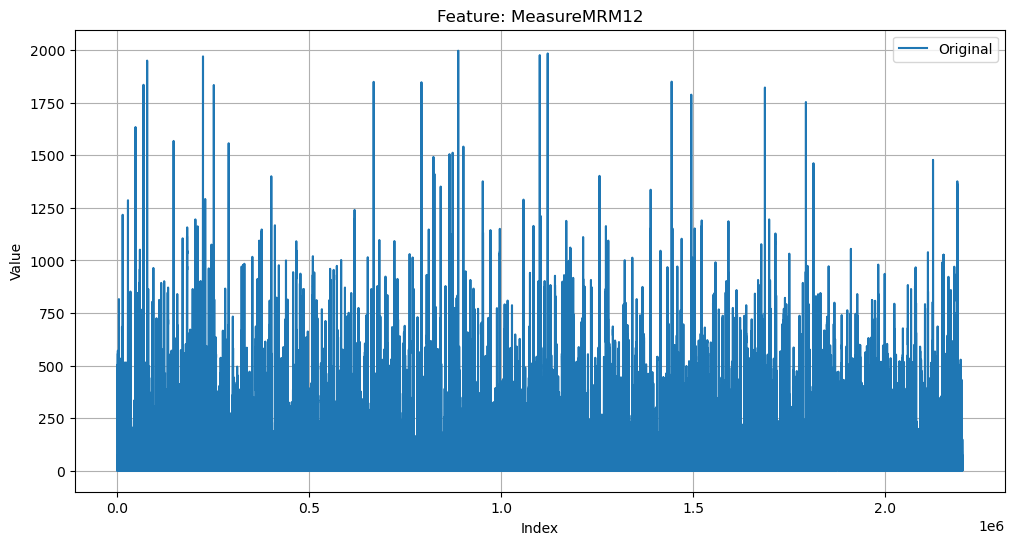

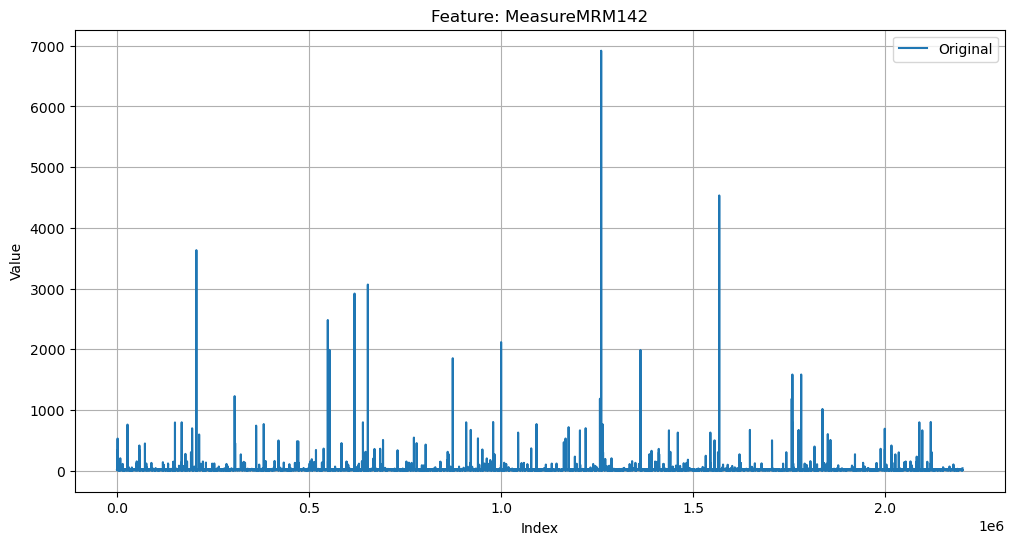

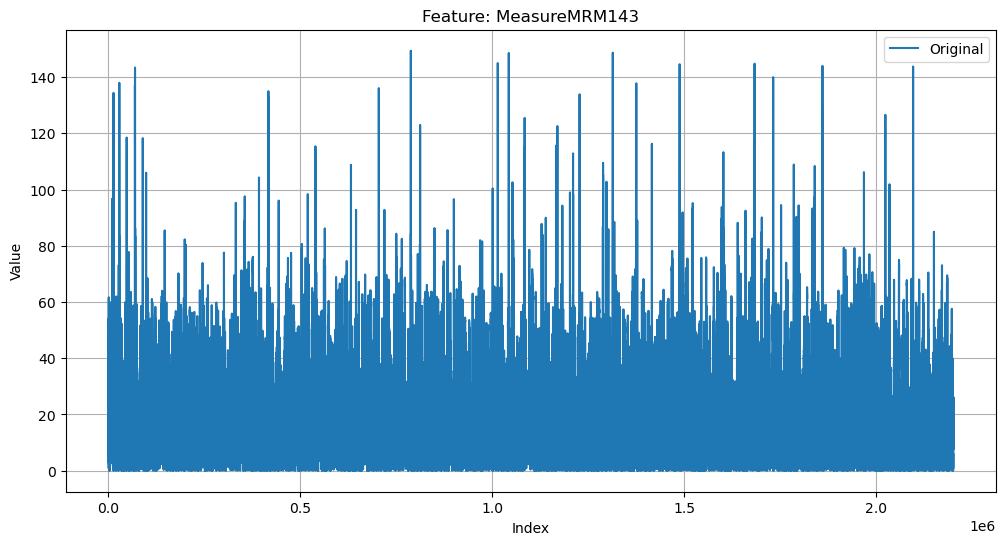

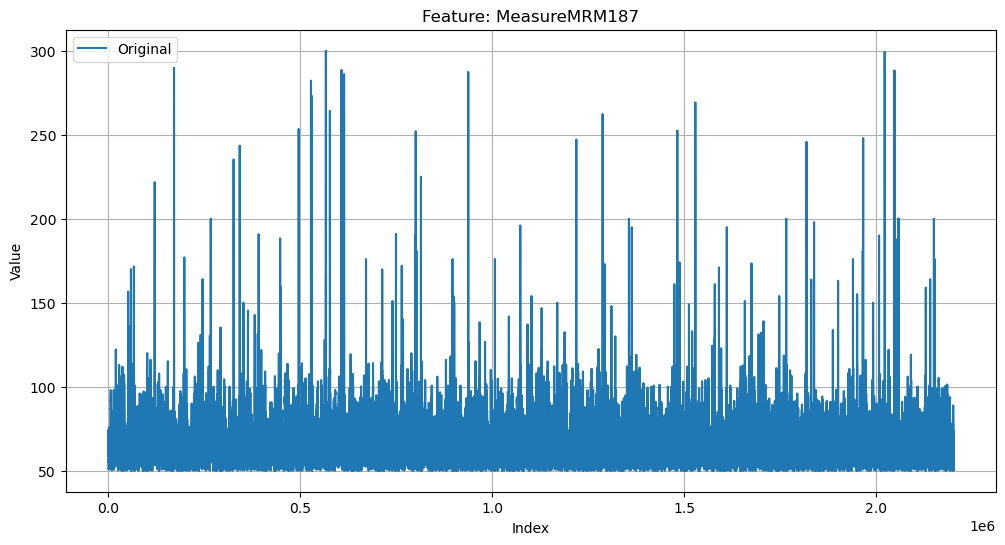

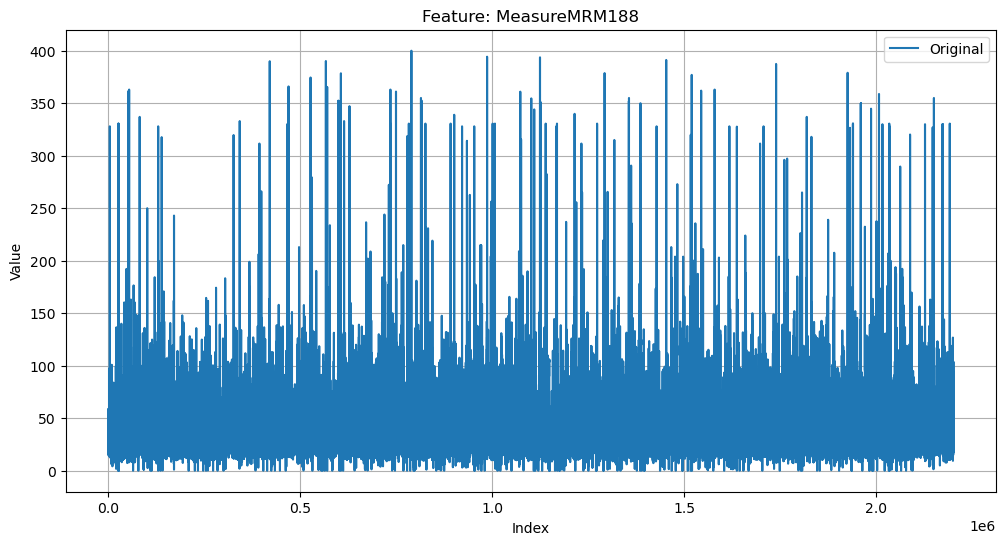

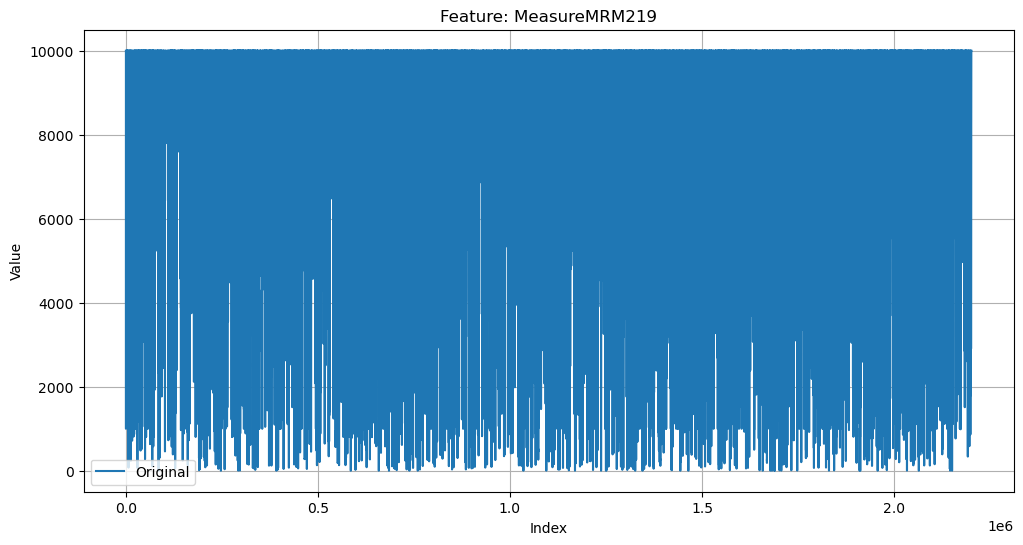

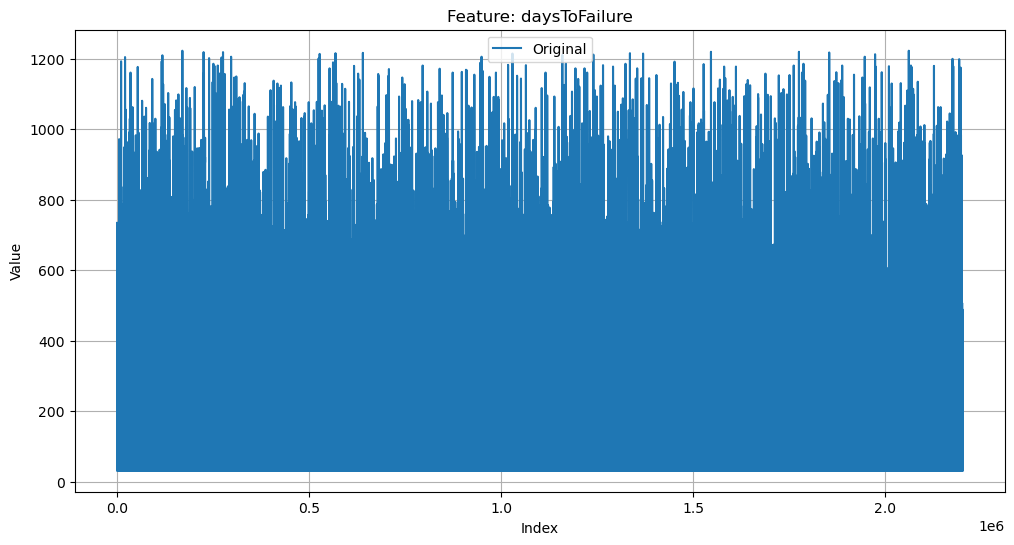

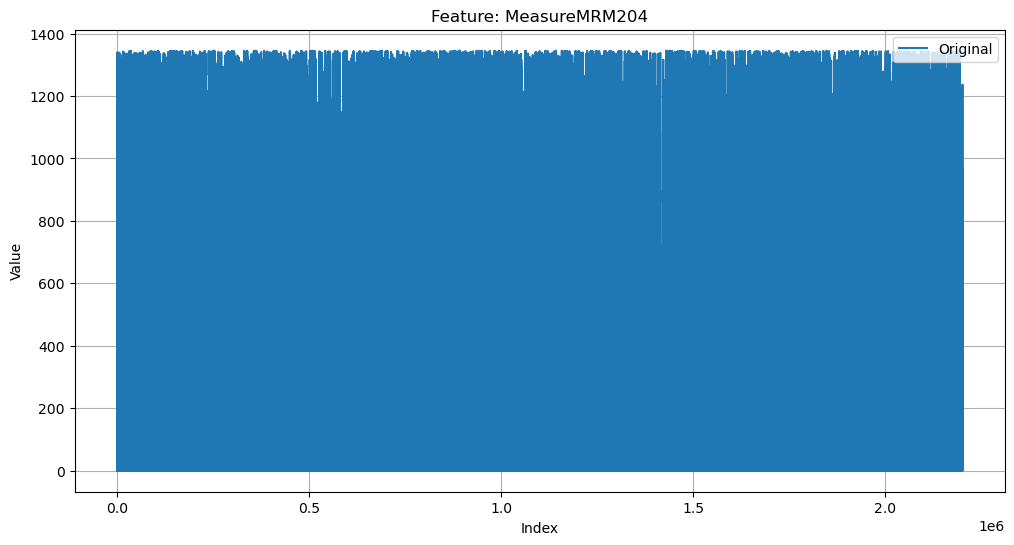

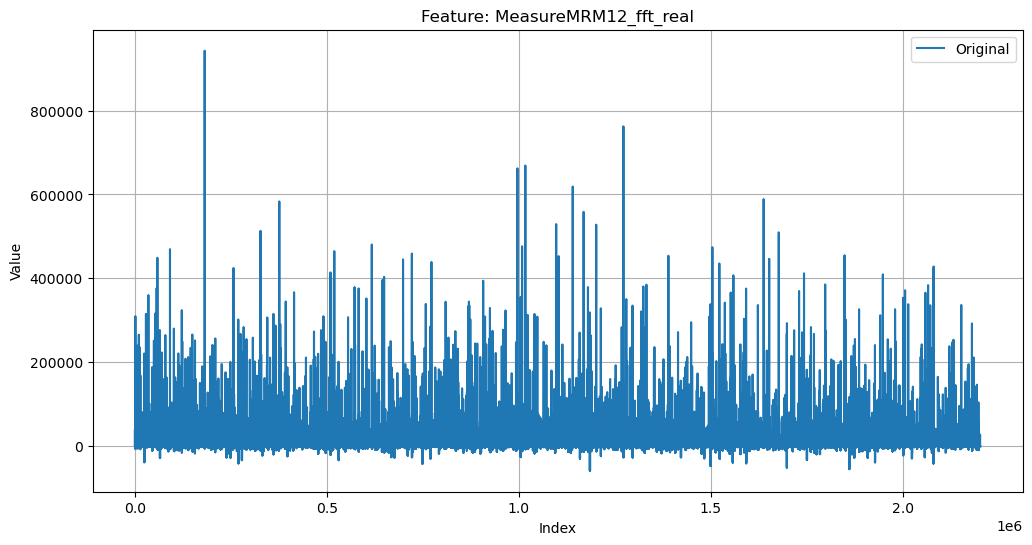

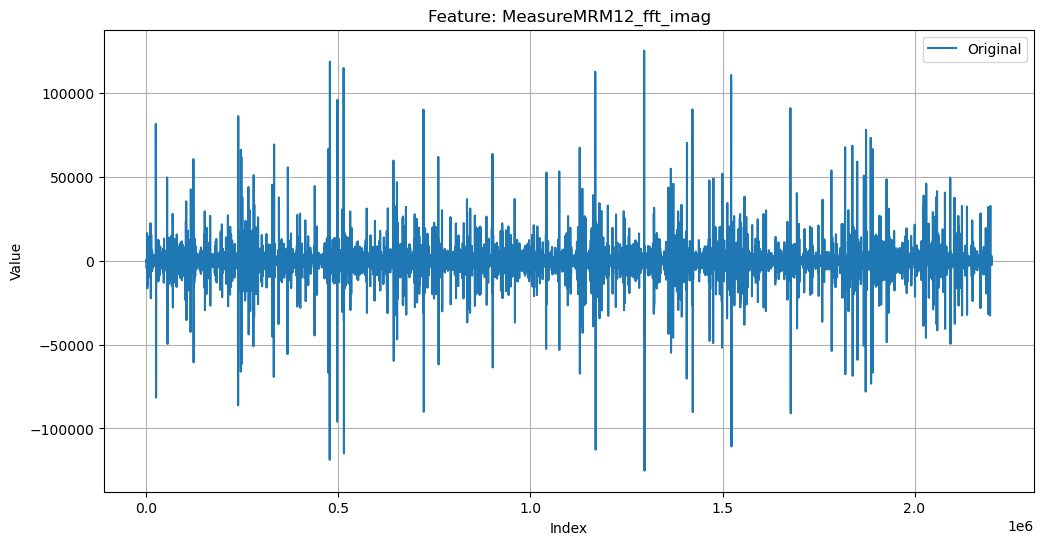

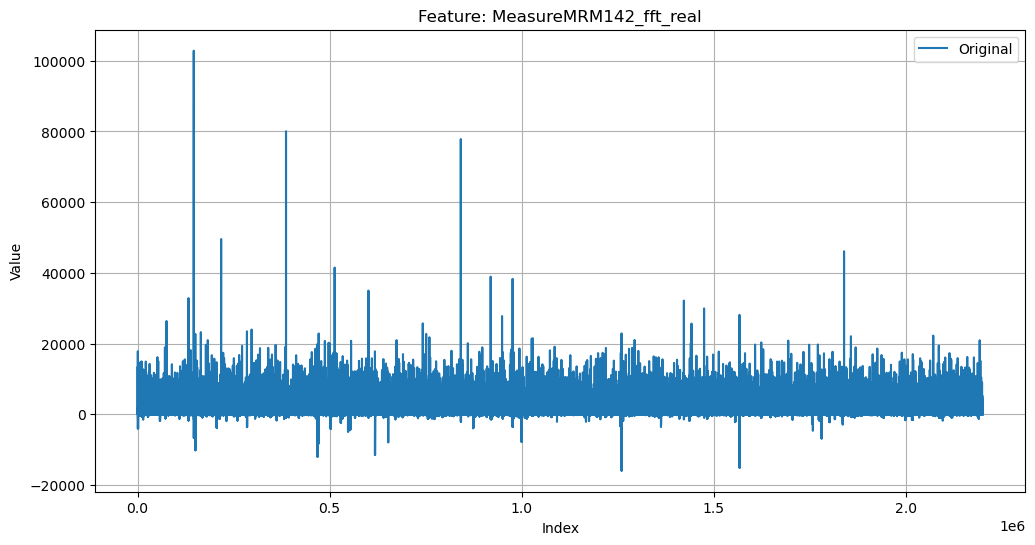

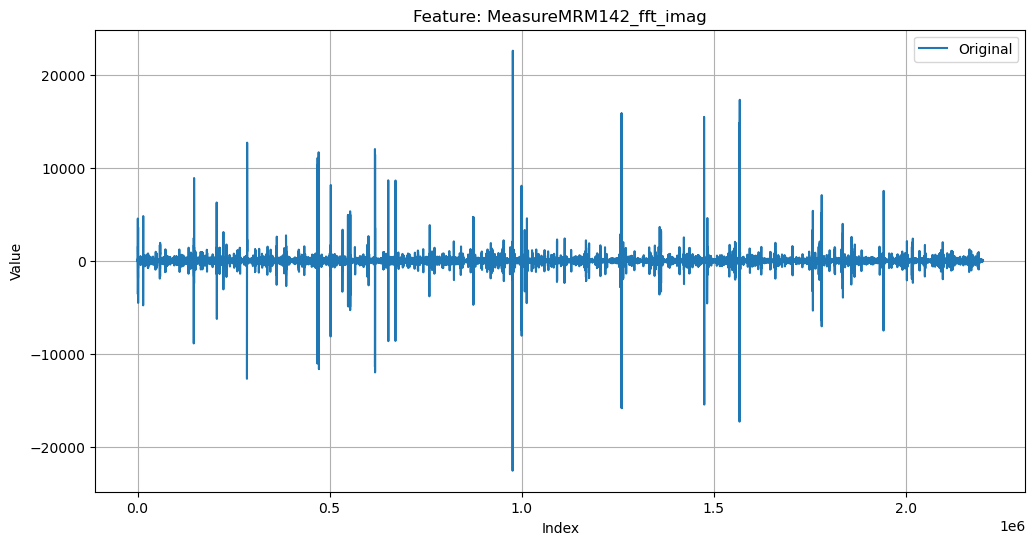

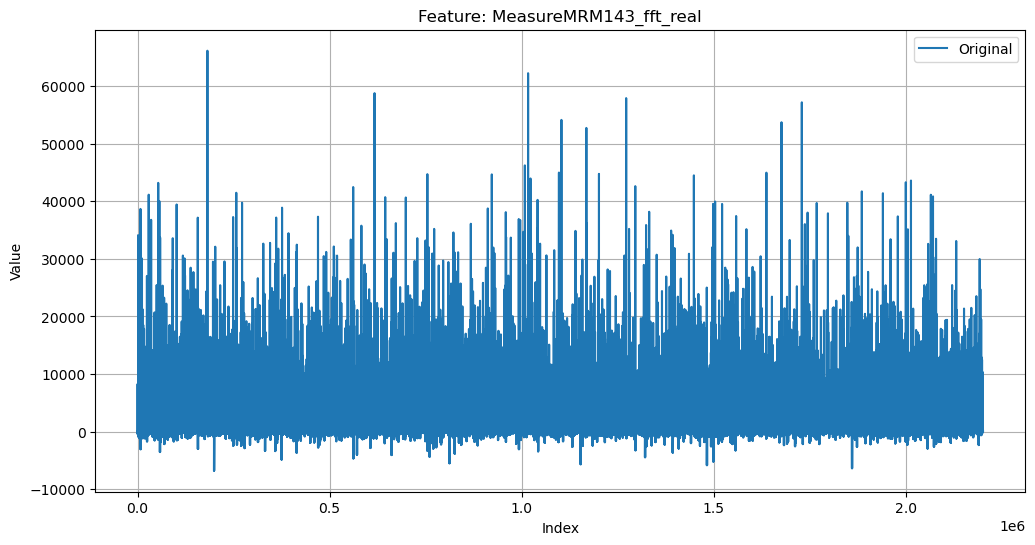

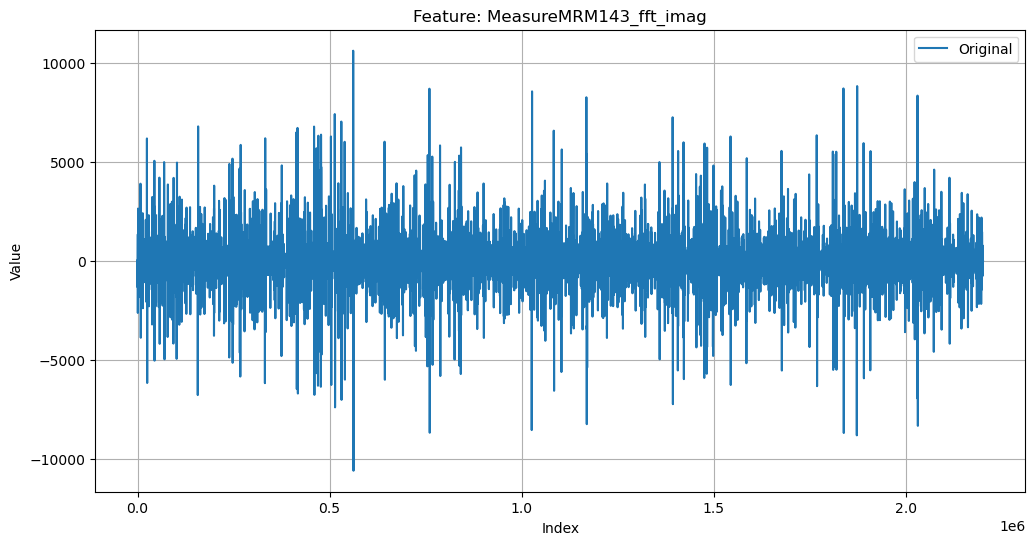

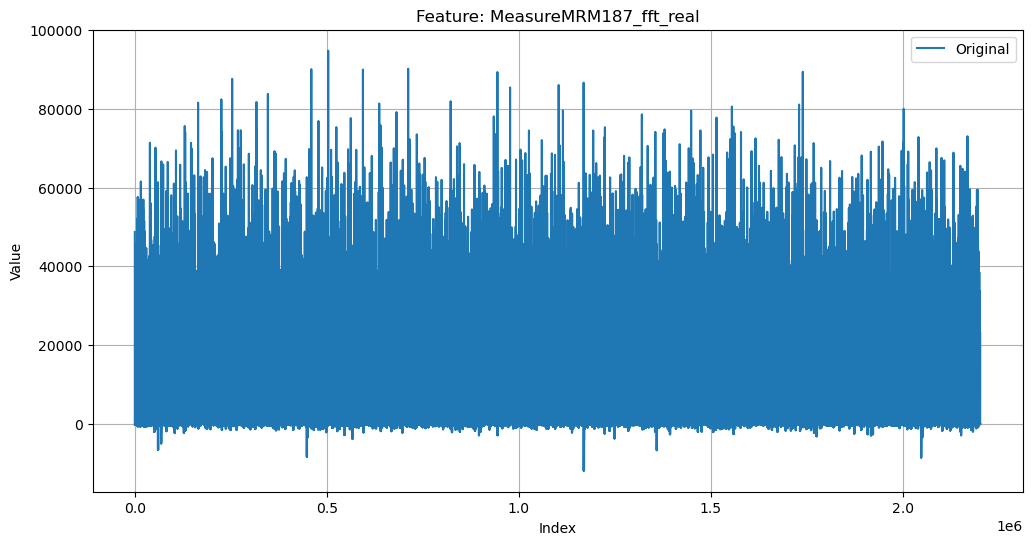

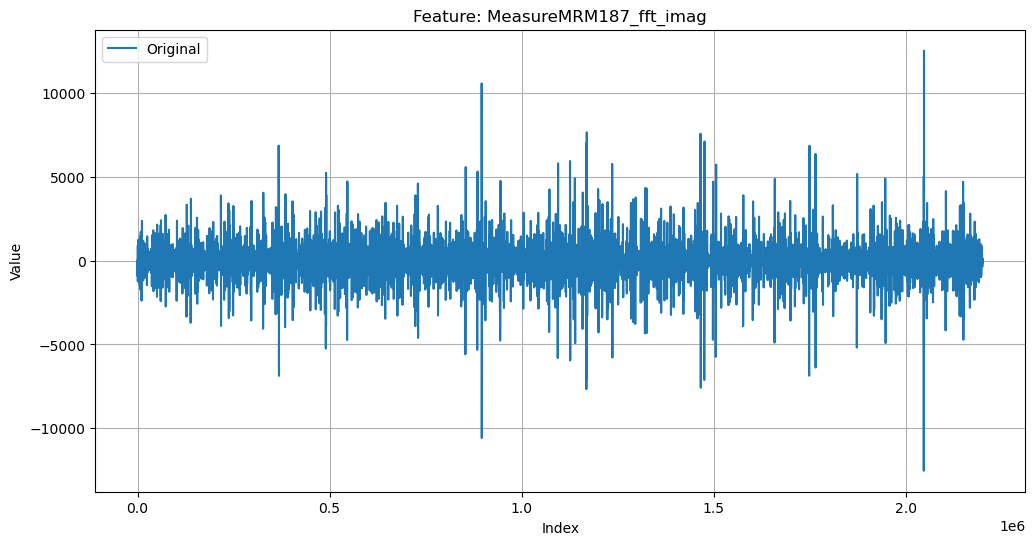

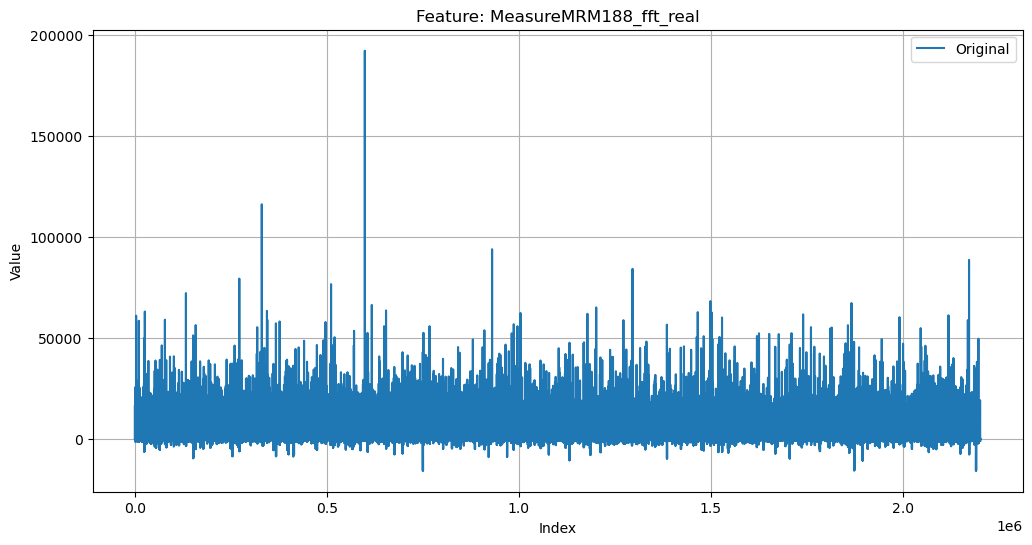

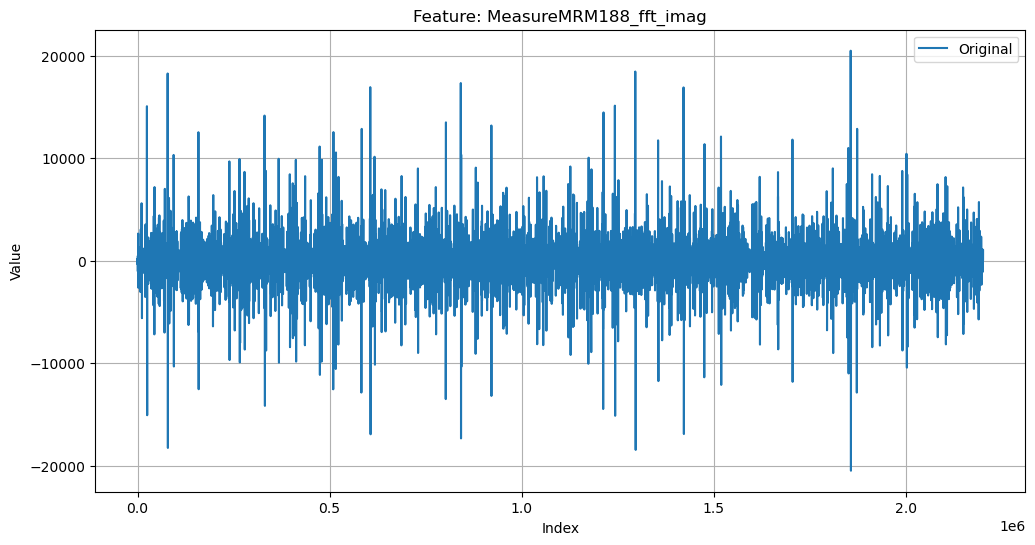

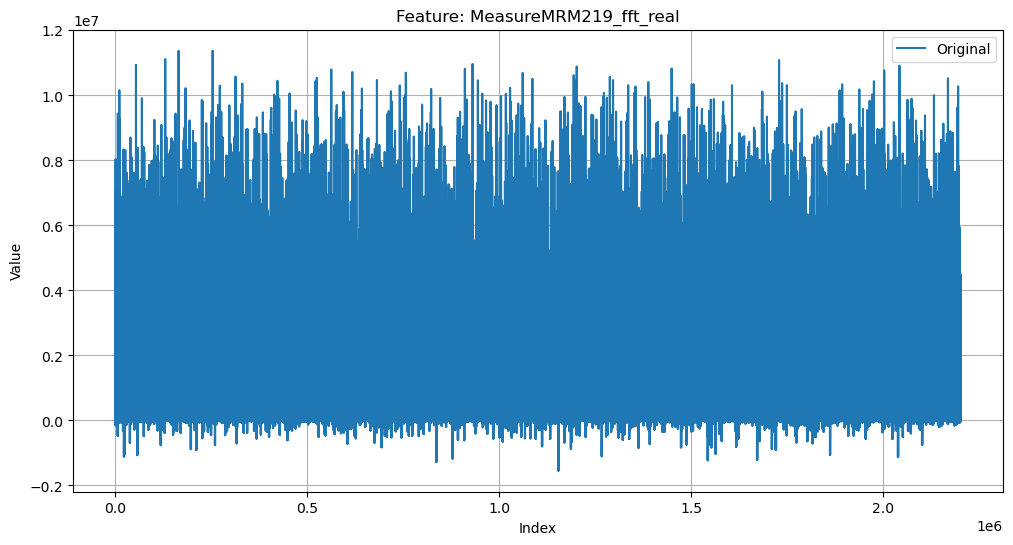

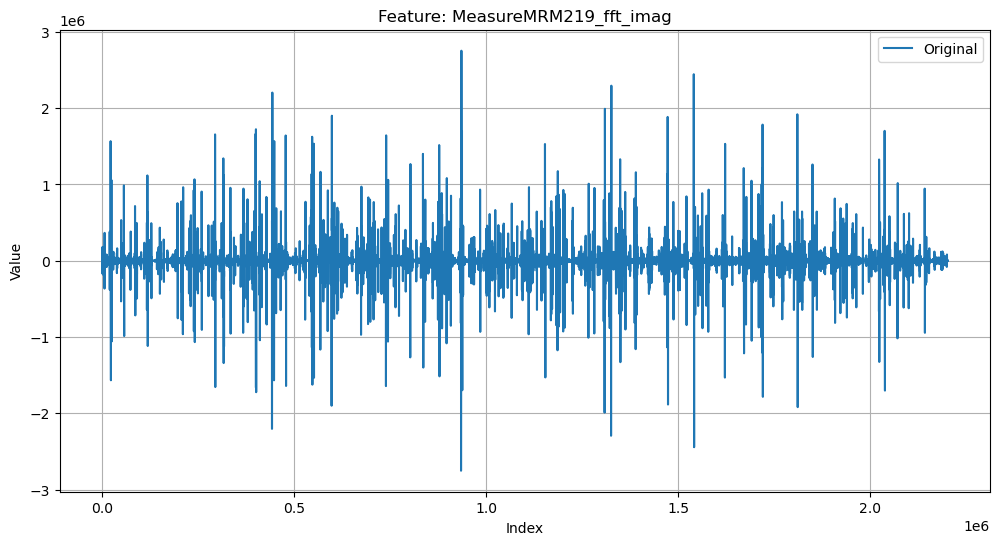

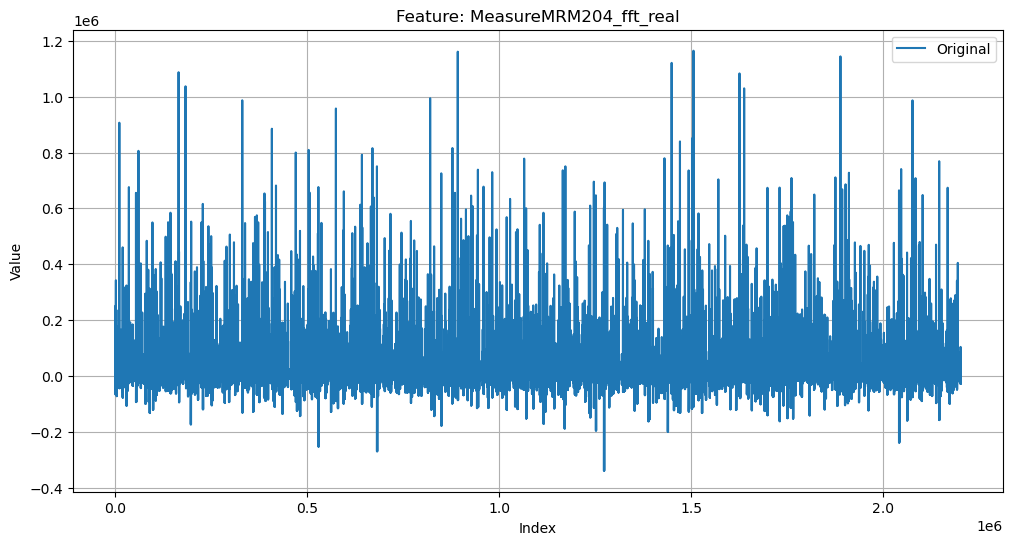

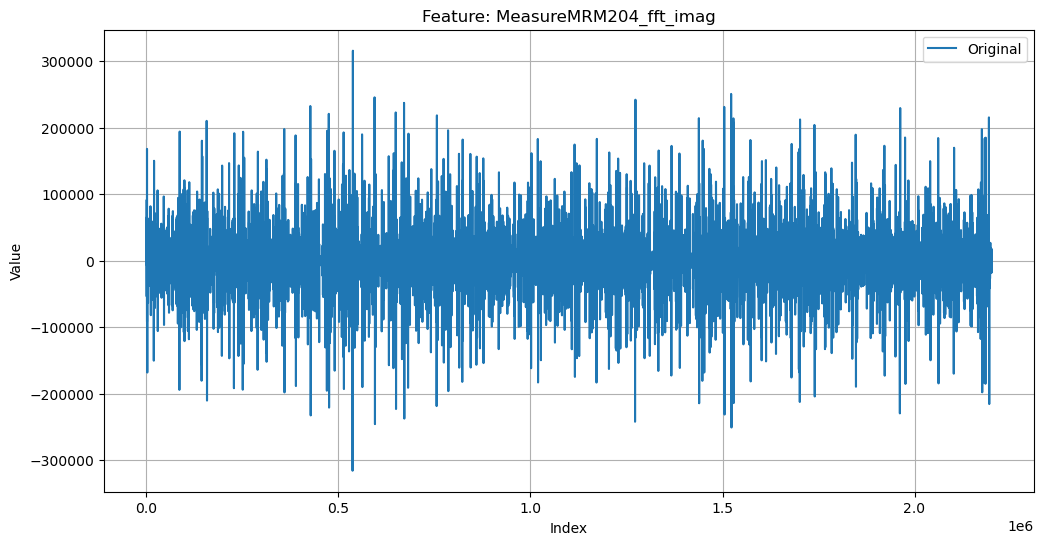

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузим данные из объединенного CSV файла
# df = pd.read_csv("fft_data.csv")

# Получаем список всех числовых колонок, кроме 'fft_real' и 'fft_imag'
features = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if not col.startswith('fft_')]

# Создаем графики для каждой фичи
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Оригинальная колонка
    plt.plot(df[feature], label='Original')
    
    # FFT реальная часть
    fft_real_col = f'fft_real_{feature}'
    if fft_real_col in df.columns:
        plt.plot(df[fft_real_col], label='FFT Real')
    
    # FFT мнимая часть
    fft_imag_col = f'fft_imag_{feature}'
    if fft_imag_col in df.columns:
        plt.plot(df[fft_imag_col], label='FFT Imag')
    
    # Настройки графика
    plt.title(f'Feature: {feature}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    
    # Сохранение графика
    # plt.savefig(f'{feature}_fft_plot.png')
    plt.show()

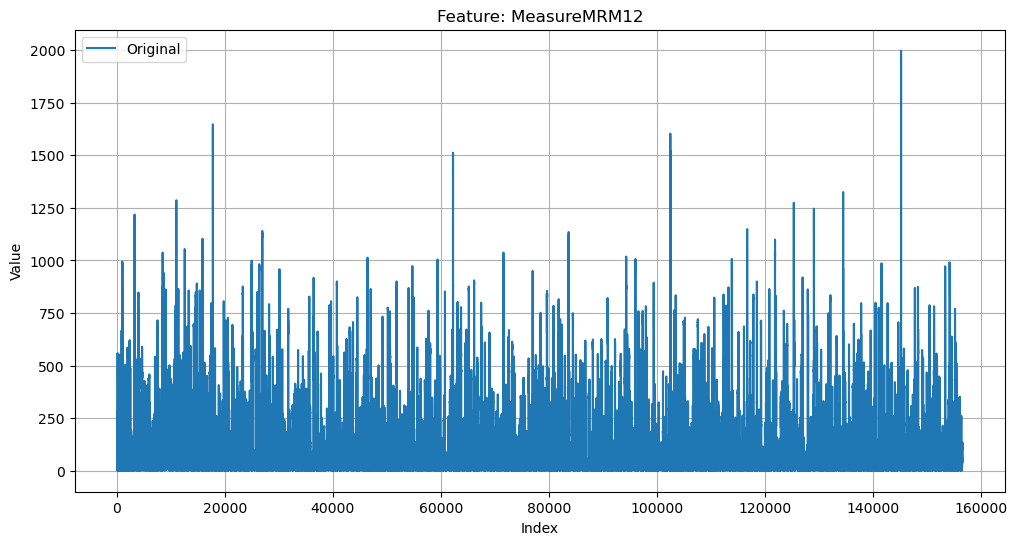

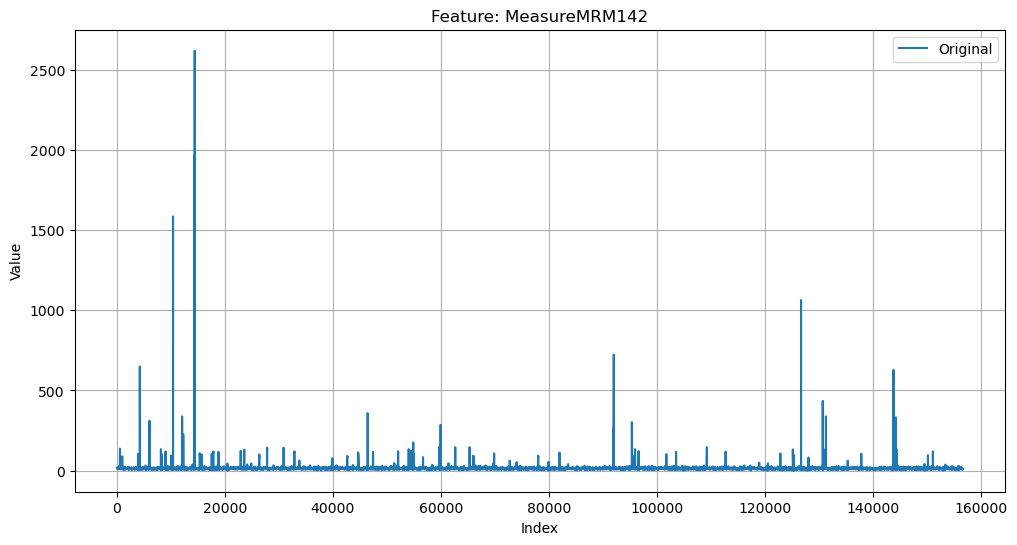

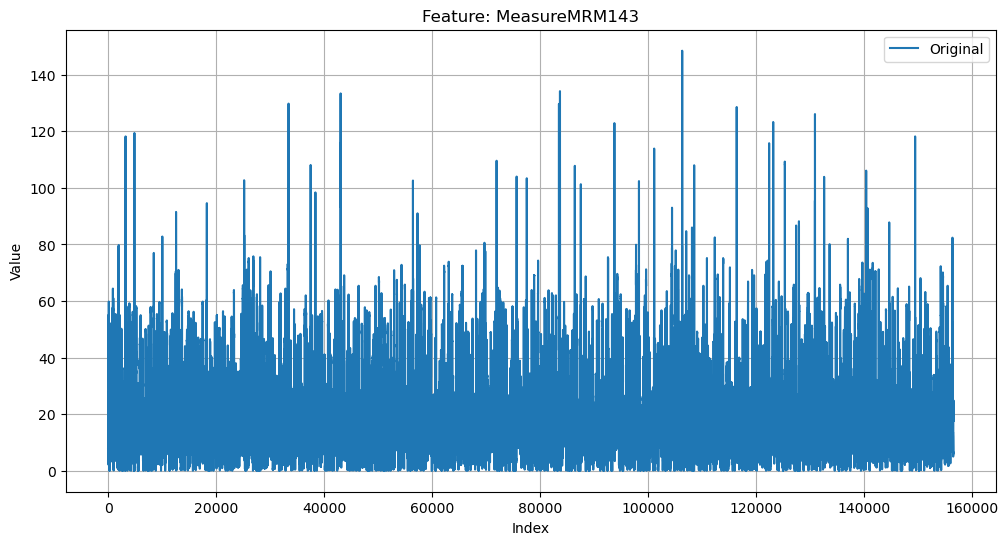

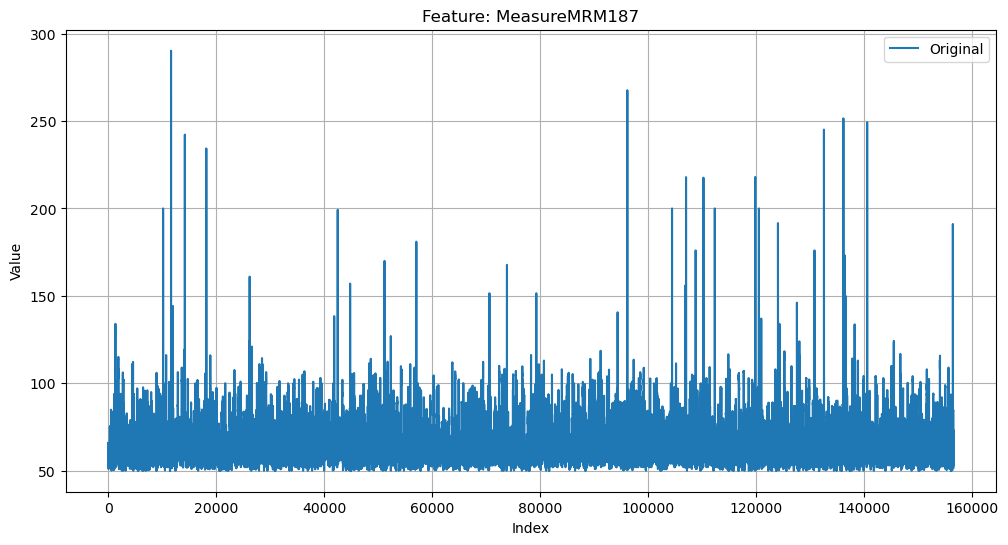

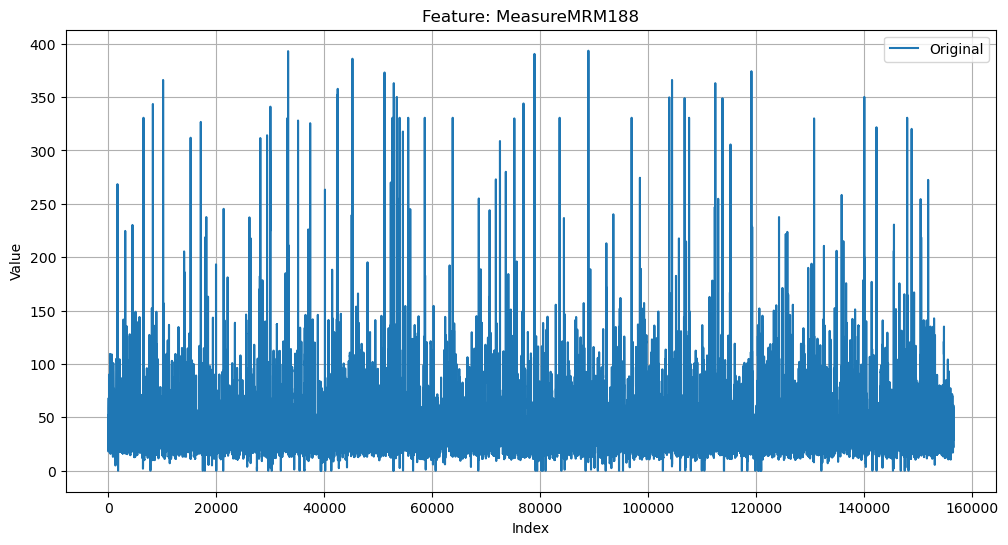

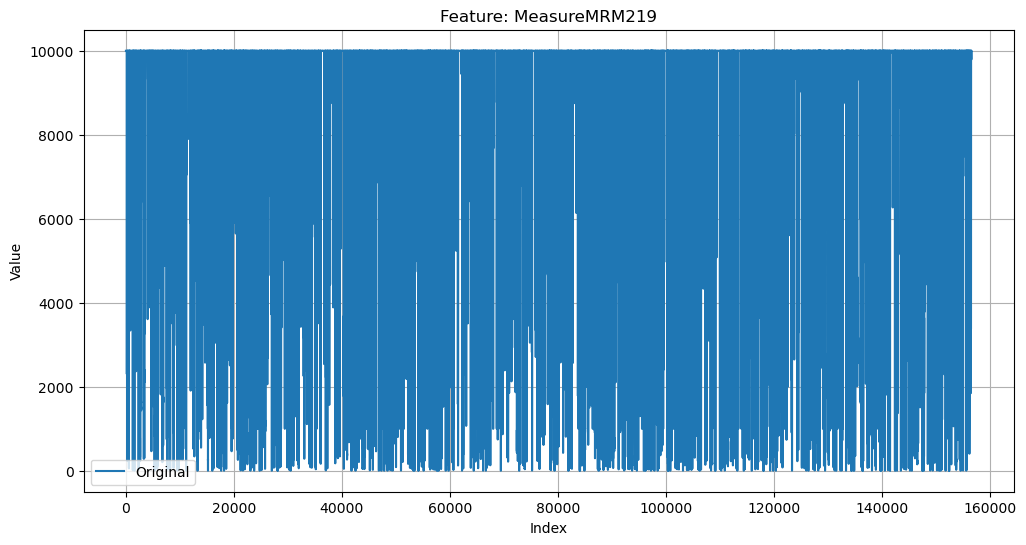

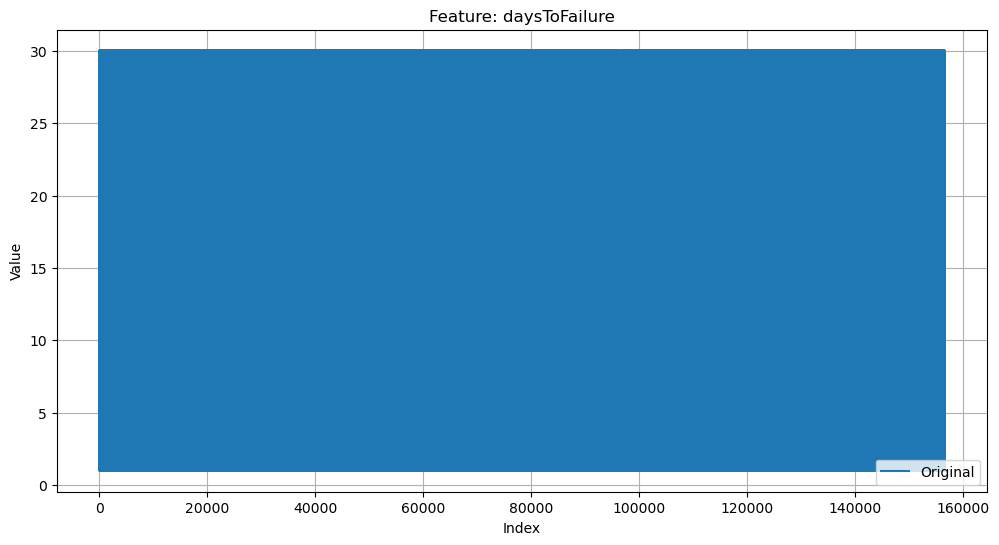

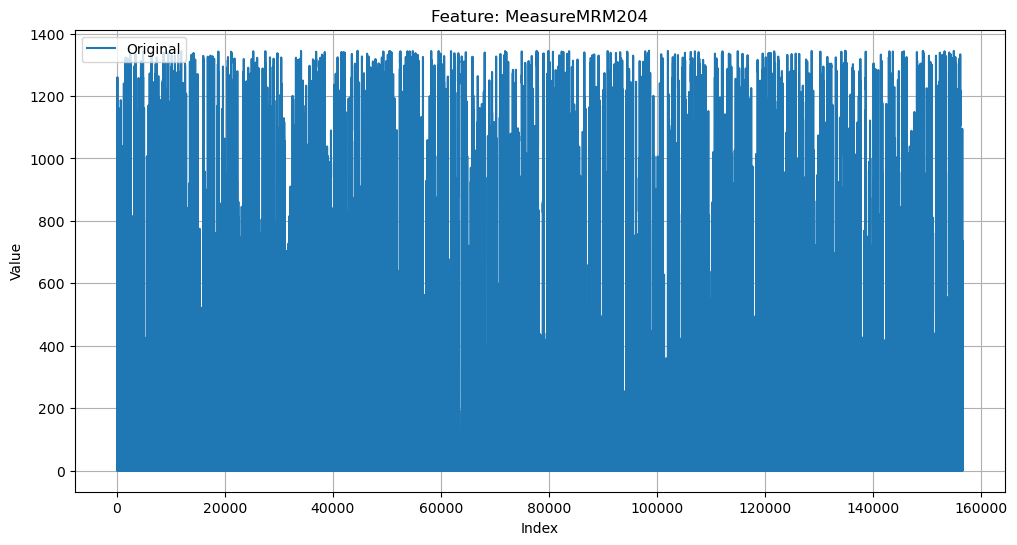

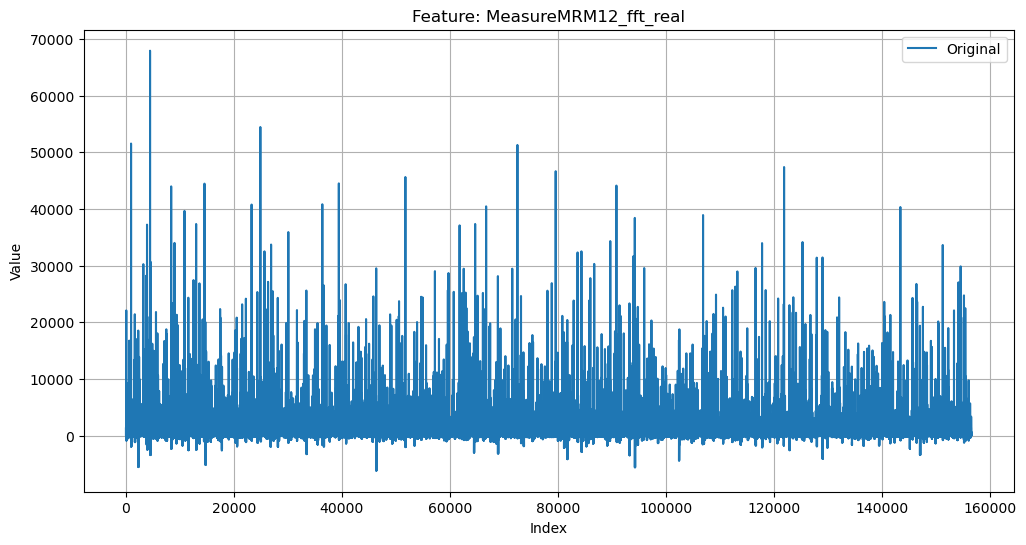

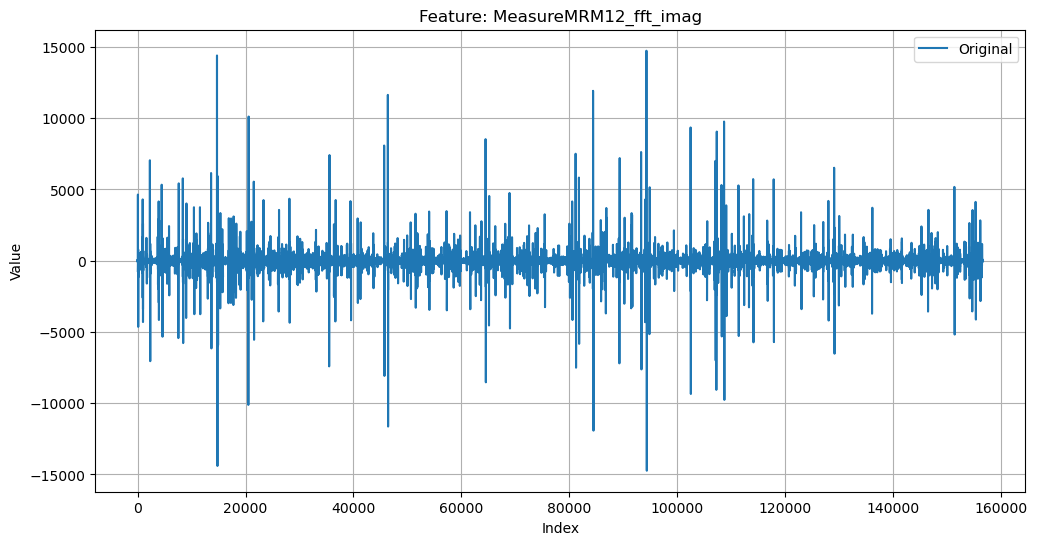

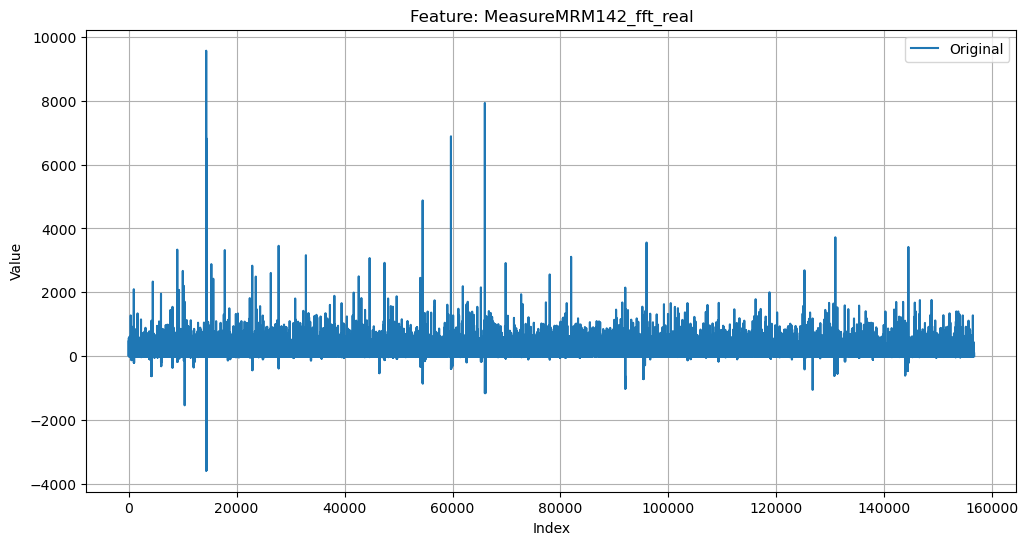

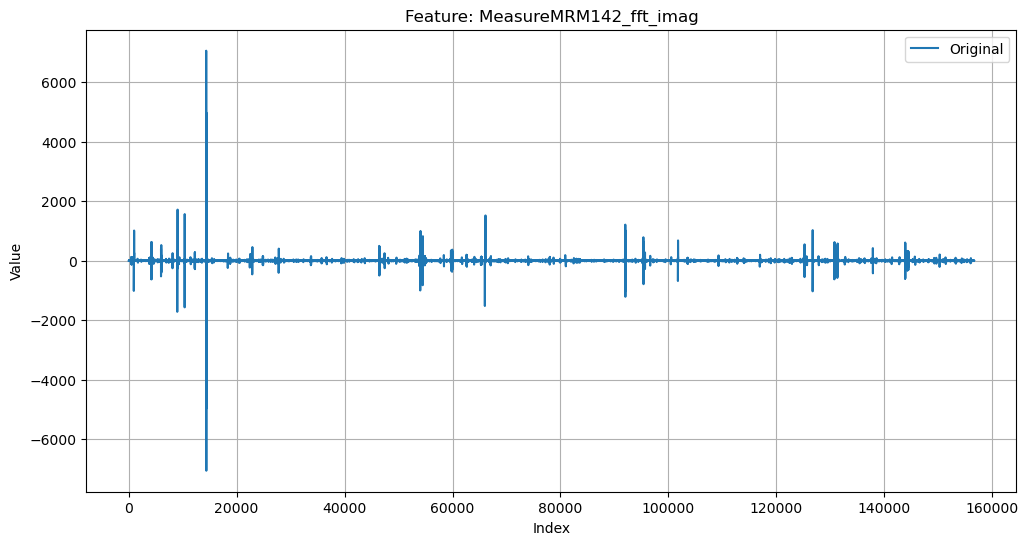

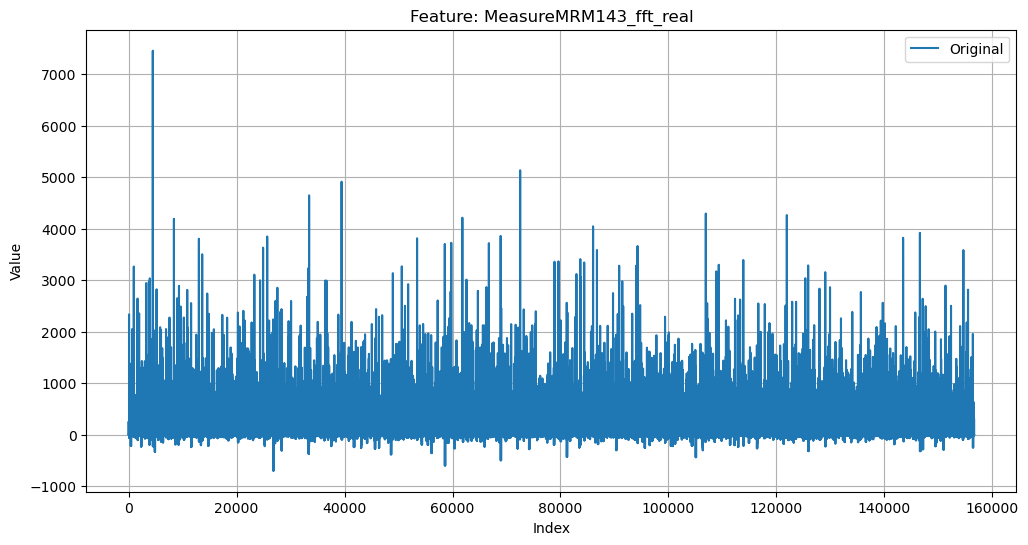

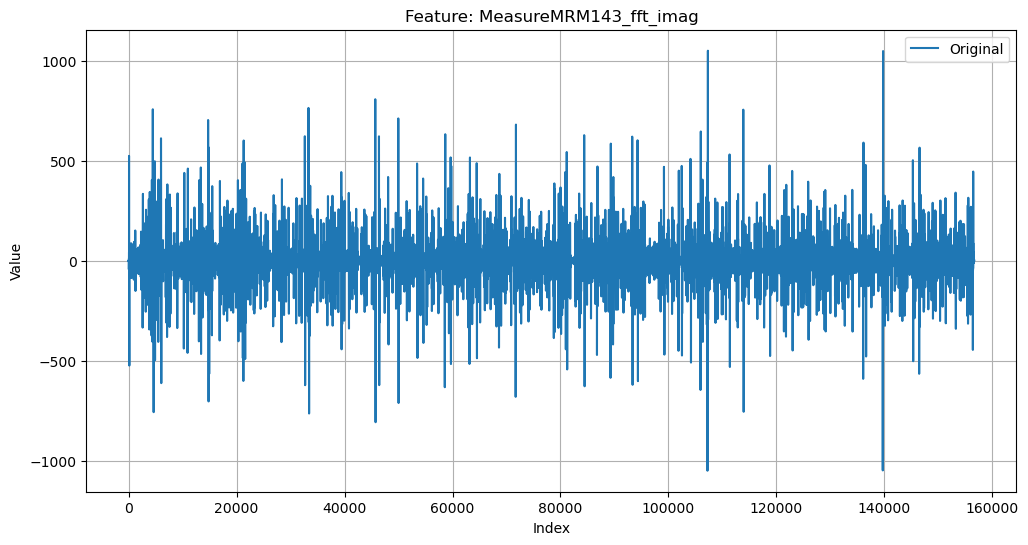

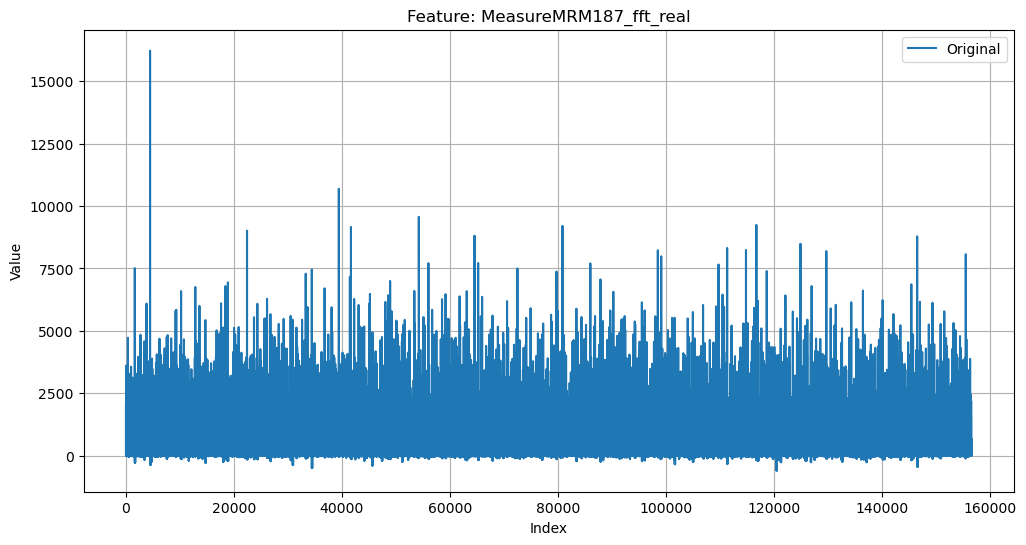

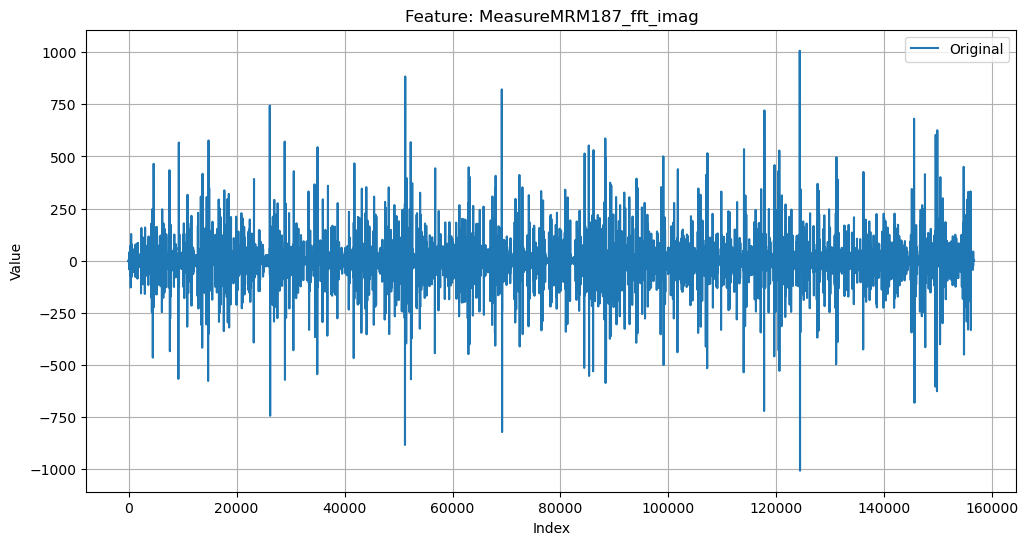

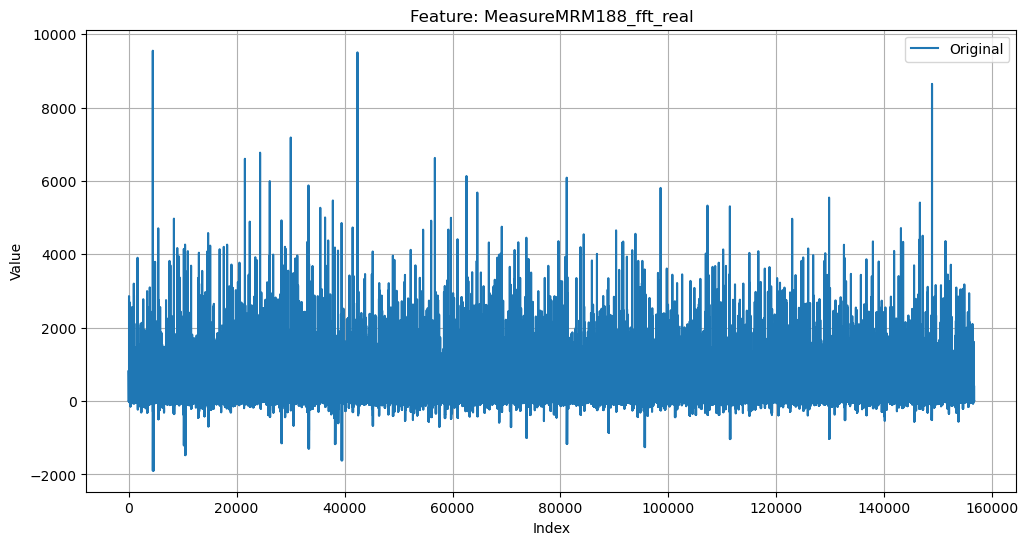

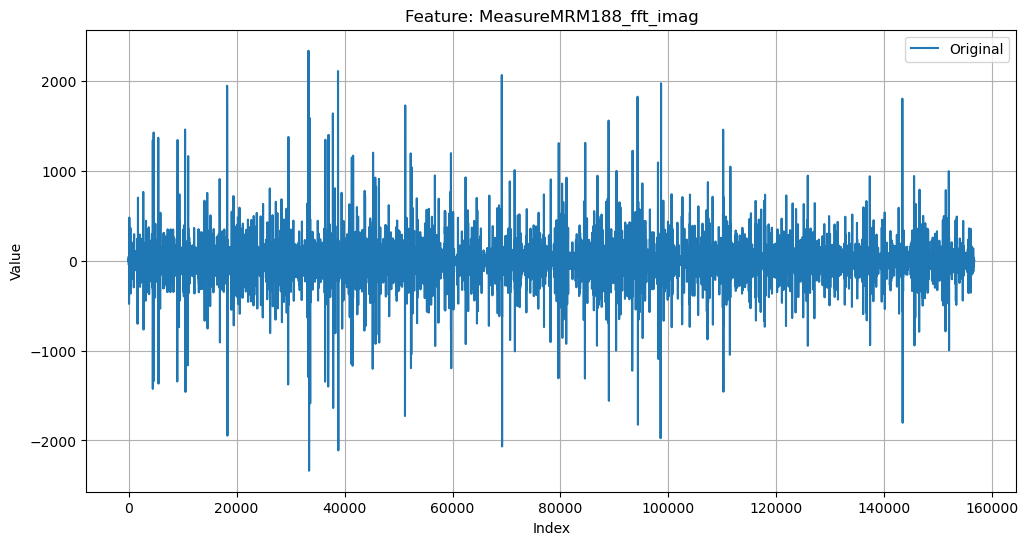

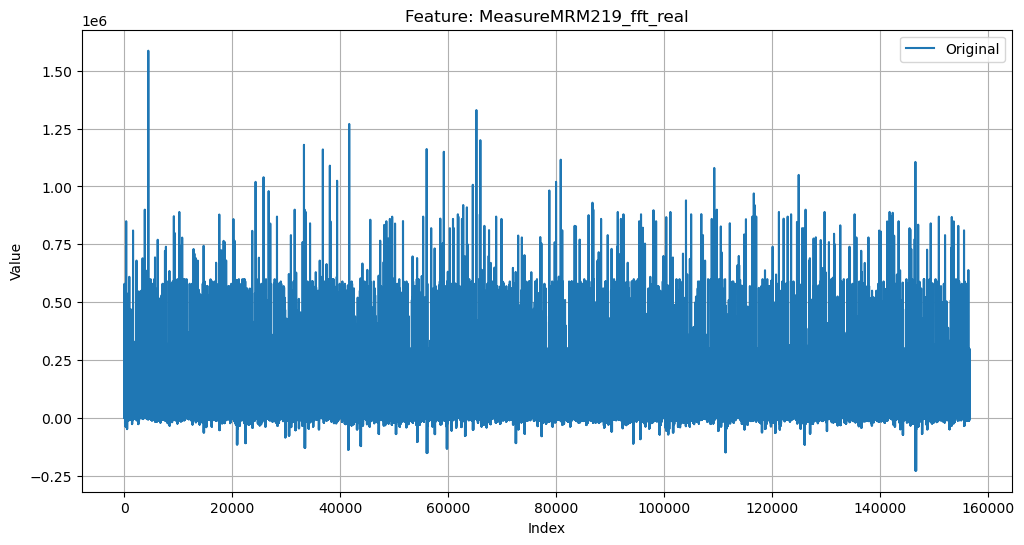

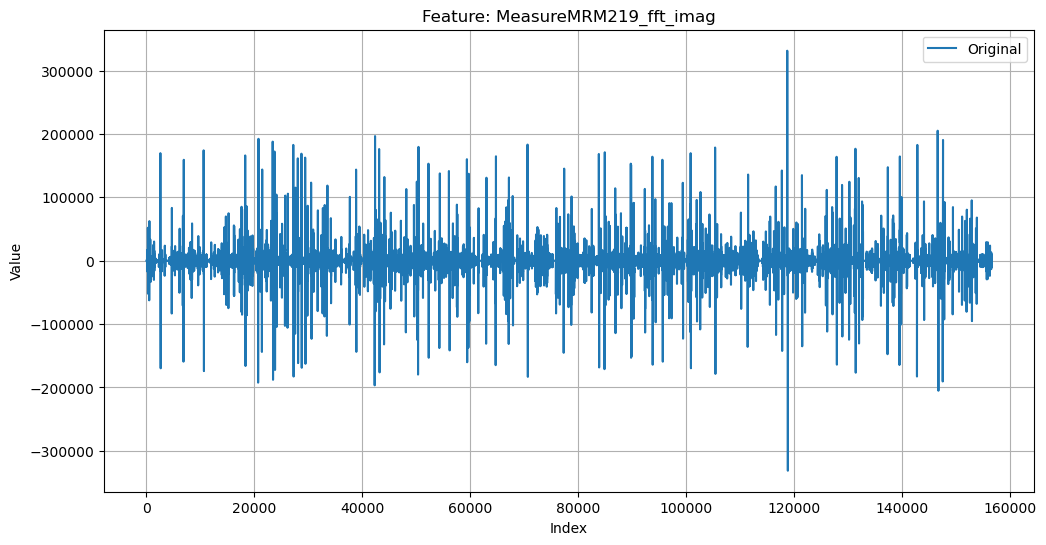

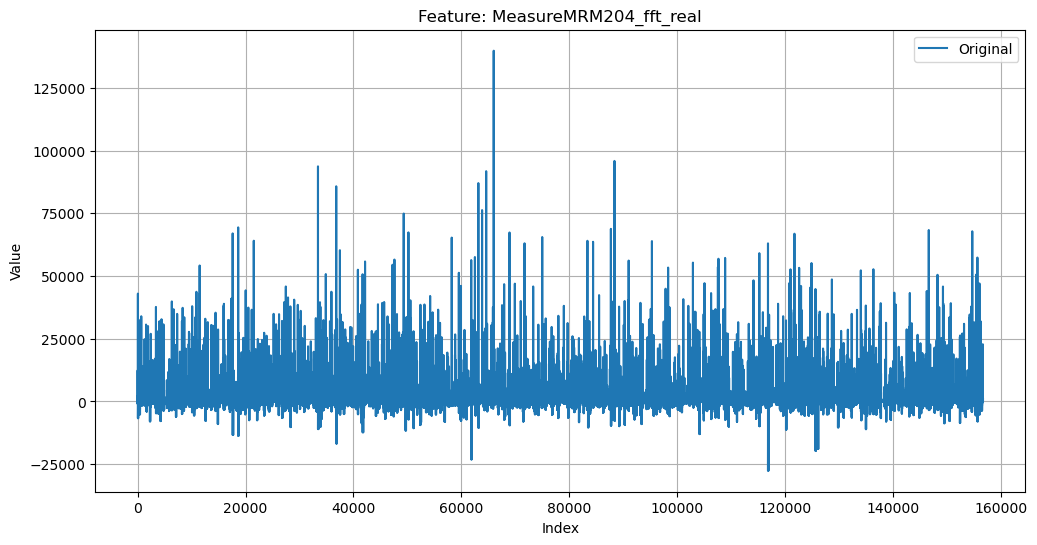

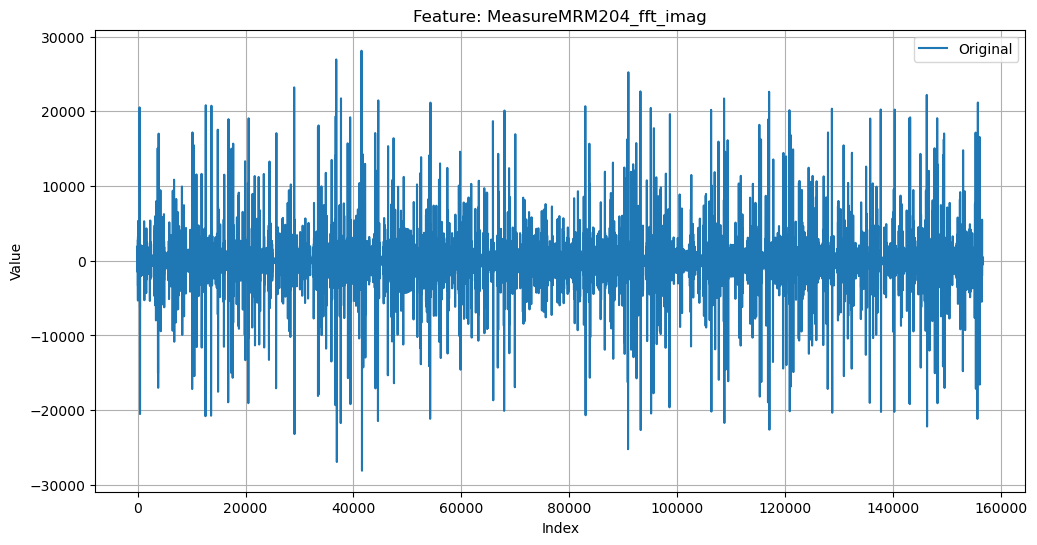

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузим данные из объединенного CSV файла
# df = pd.read_csv("fft_data.csv")

# Получаем список всех числовых колонок, кроме 'fft_real' и 'fft_imag'
features = [col for col in anom.select_dtypes(include=['float64', 'int64']).columns if not col.startswith('fft_')]

# Создаем графики для каждой фичи
for feature in features:
    plt.figure(figsize=(12, 6))
    
    # Оригинальная колонка
    plt.plot(anom[feature], label='Original')
    
    # FFT реальная часть
    fft_real_col = f'fft_real_{feature}'
    if fft_real_col in anom.columns:
        plt.plot(anom[fft_real_col], label='FFT Real')
    
    # FFT мнимая часть
    fft_imag_col = f'fft_imag_{feature}'
    if fft_imag_col in anom.columns:
        plt.plot(anom[fft_imag_col], label='FFT Imag')
    
    # Настройки графика
    plt.title(f'Feature: {feature}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    
    # Сохранение графика
    # plt.savefig(f'{feature}_fft_plot.png')
    plt.show()